****Project: House Prices - Advanced Regression Techniques****


- Objective: predict house prices on a dataset on houses with 80 features
- Data: https://www.kaggle.com/c/home-data-for-ml-course/data

****Overview****
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

****Introduction:****

This is one of many projects I plan on sharing on my github. Here, I am practicing my data analysis, data visualization, data cleaning, feature engineering, machine learning model building, and module optimization. This is also part of Kaggler's "Housing Price Prediction Competition", where the goal is to predict house prices with the goal in mind of minimizing the mean absolute error.

****Notes:****
- I have previously submitted my predictions in another notebook (which should also be on my github), where I acheived placing in the top 4% in the competition (out of ~20,000 submissions) with a Mean Absolute error of $15,131.99
- In the previous notebook I submitted, I deduced that XGBRessor was optimal based off of trial an error (in this notebook, I plan on cross-validating the models to be more deductive with my claim)
- This is an unfinished notebook, but provides a series of useful scripts, libraries, models, and techniques for deep learning, Exploratory analysis, model building, model tuning, and model optimizing. 

****Data Analysis****

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all columns of df
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Loading data
path = 'C:\\Users\\nikob\\data_imports\\'
train = pd.read_csv(path+'train.csv') 
test = pd.read_csv(path+'test.csv')

# Combining data for future use, if necessary
df = pd.concat([train, test], keys=['train', 'test'])

In [3]:
df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   

        LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
train 0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
      1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
      2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

        Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
train 0       Norm     1Fam     2Story            7            5       2003   
      1       Norm     1Fam     1Story            6            8       1976   
      2       Norm     1Fam     2Story            7            5       2001   

         YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
train 0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
      1          1976     Gable  CompShg     MetalSd     MetalSd       None   
      2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

         MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
train 0       196.0        Gd        TA      PConc       Gd       TA   
      1         0.0        TA        TA     CBlock       Gd       TA   
      2       162.0        Gd        TA      PConc       Gd       TA   

        BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
train 0           No          GLQ       706.0          Unf         0.0   
      1           Gd          ALQ       978.0          Unf         0.0   
      2           Mn          GLQ       486.0          Unf         0.0   

         BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
train 0      150.0        856.0    GasA        Ex          Y      SBrkr   
      1      284.0       1262.0    GasA        Ex          Y      SBrkr   
      2      434.0        920.0    GasA        Ex          Y      SBrkr   

         1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
train 0       856       854             0       1710           1.0   
      1      1262         0             0       1262           0.0   
      2       920       866             0       1786           1.0   

         BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
train 0           0.0         2         1             3             1   
      1           1.0         2         0             3             1   
      2           0.0         2         1             3             1   

        KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
train 0          Gd             8        Typ           0         NaN   
      1          TA             6        Typ           1          TA   
      2          Gd             6        Typ           1          TA   

        GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
train 0     Attchd       2003.0          RFn         2.0       548.0   
      1     Attchd       1976.0          RFn         2.0       460.0   
      2     Attchd       2001.0          RFn         2.0       608.0   

        GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
train 0         TA         TA          Y           0           61   
      1         TA         TA          Y         298            0   
      2         TA         TA          Y           0           42   

         EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  \
train 0              0          0            0         0    NaN   NaN   
      1              0          0            0         0    NaN   NaN   
      2              0          0            0         0    NaN   NaN   

        MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
train 0         NaN        0       2    2008       WD  

In [4]:
df.shape

(2919, 81)

****Requirement to Satisfy in the Data Analysis Phase****
1. Missing Values
2. All the numerical variables
3. Distribution of the numerical variables
- Focus is here because this is a regression problem
- If the data is skewed, there needs to be a transformation
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers 
7. Relationship between independent and dependent feature (SalePrice)

****Missing Values****

In [5]:
# checking percentage of NaN values present in each feature

# List of features with missing values in training dataset
Na_features_train = [ features for features in train.columns if train[features].isnull().sum() >= 1]

for feature in Na_features_train:
    missing = np.round(train[feature].isnull().mean(), 4)
    print(feature, round(missing*100,2), ' % NaN')

LotFrontage 17.74  % NaN
Alley 93.77  % NaN
MasVnrType 0.55  % NaN
MasVnrArea 0.55  % NaN
BsmtQual 2.53  % NaN
BsmtCond 2.53  % NaN
BsmtExposure 2.6  % NaN
BsmtFinType1 2.53  % NaN
BsmtFinType2 2.6  % NaN
Electrical 0.07  % NaN
FireplaceQu 47.26  % NaN
GarageType 5.55  % NaN
GarageYrBlt 5.55  % NaN
GarageFinish 5.55  % NaN
GarageQual 5.55  % NaN
GarageCond 5.55  % NaN
PoolQC 99.52  % NaN
Fence 80.75  % NaN
MiscFeature 96.3  % NaN


In [6]:
# creating missing values count variable
missing_values_count = train.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = round((total_missing/total_cells) * 100, 2)
print('percent of missing cell values: '+ str(percent_missing)+'%')

percent of missing cell values: 5.89%


In [17]:
#Checking null values for all columns
obj = train.isnull().sum()
for key,value in obj.iteritems():
    if value != 0:
        print(key,",",value)

LotFrontage , 259
Alley , 1369
MasVnrType , 8
MasVnrArea , 8
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinType2 , 38
Electrical , 1
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageQual , 81
GarageCond , 81
PoolQC , 1453
Fence , 1179
MiscFeature , 1406


****Relationship between missing values and Sale Price****

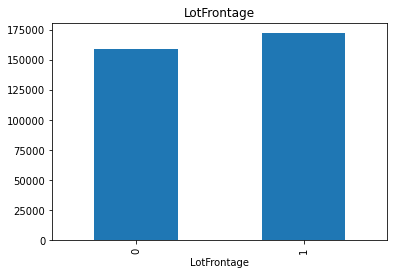

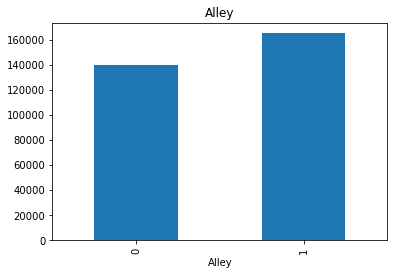

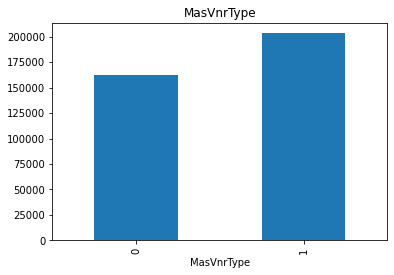

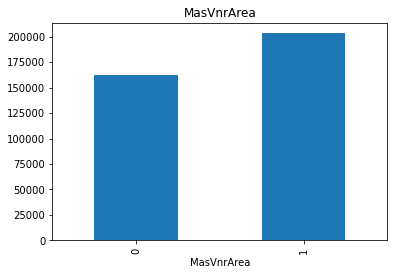

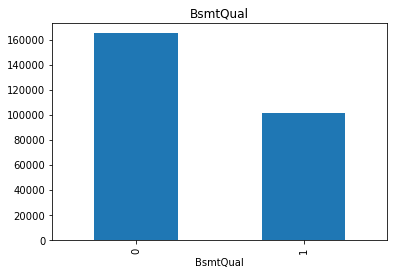

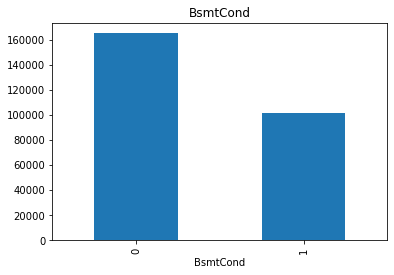

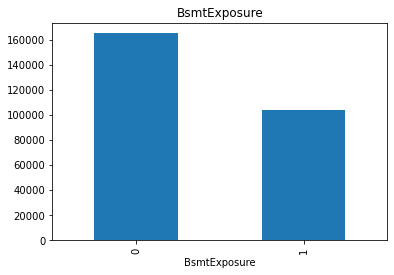

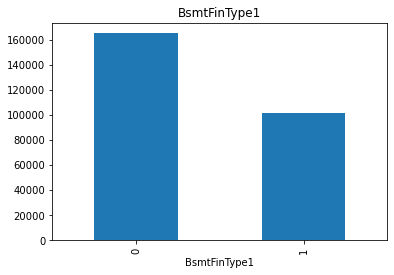

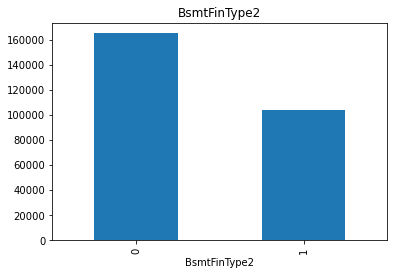

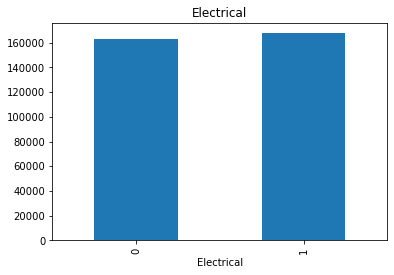

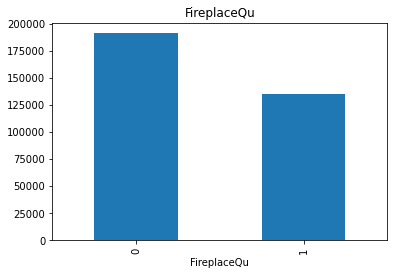

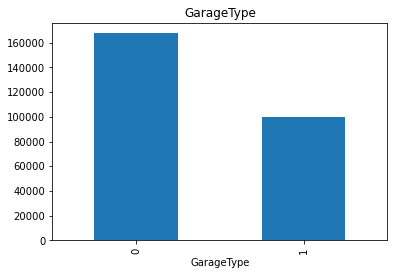

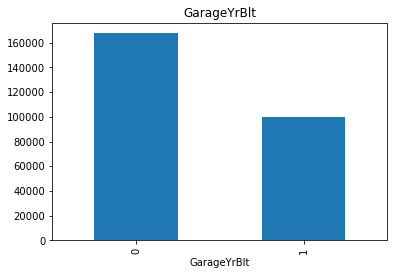

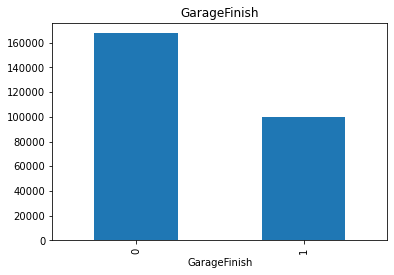

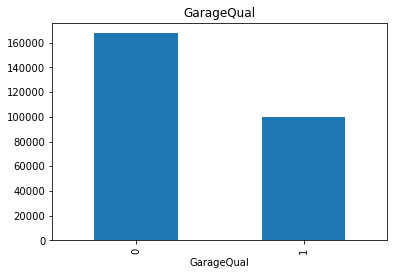

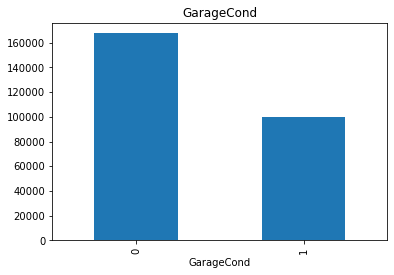

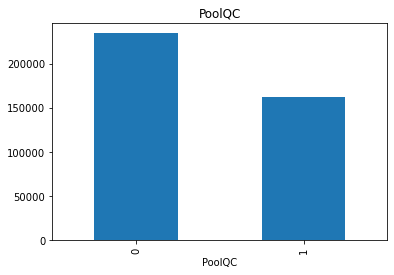

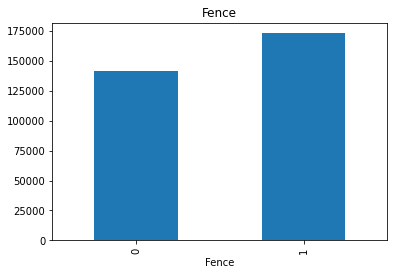

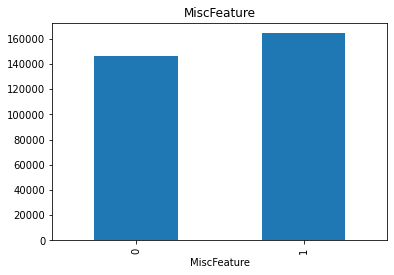

In [18]:
for feature in Na_features_train:
    data = train.copy()
    
    # Creating variable that indicates 1 for missing / 0 for not
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Calculating mean SalePrice where data is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Conclusion: 
- The relationship between the missing values and sale price is significant
- The median price for the missing value(s) group, for numerous columns, shows a higher price than the present data group, which indicates that there is an importance on filling in the NaN values with meaningful data (done in feature engineering). 
- For some features, the missing value(s) groups are significantly lower than the group without missing values, which indicates that the lack of that feature (i.e. having no basement) has a negative correlation towards sale price.

****Numerical Variables****

In [7]:
# Creating list of numerical features
num_feats = [feature for feature in train.columns if train[feature].dtype != 'O']

print('Number of numerical features: ', len(num_feats))
train[num_feats].head()

Number of numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


****Temporal Variables****

- There are 4 year features
- Extracting information from these year features (such as AgeSold) can manufacter more easily digestible data for the machine learning models

In [8]:
# List of variables that contain year (temporal features)
temporals = [feature for feature in num_feats if 'Yr' in feature or 'Year' in feature]

temporals

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
# Exploring content of temporal variables
for temporal in temporals:
    print(temporal, train[temporal].unique())
    print('------------------------------------------------------------')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
------------------------------------------------------------
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
------------------------------------

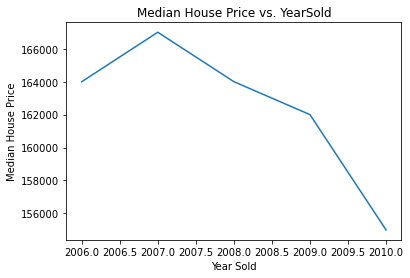

In [22]:
# Analyzing Temporals

# relationship between year sold and median SalePrice
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('Median House Price vs. YearSold')
plt.show()

Conclusion: Over time, the sale price has decreased based off this dataset

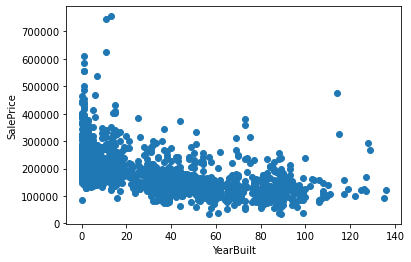

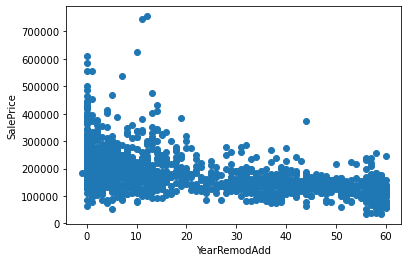

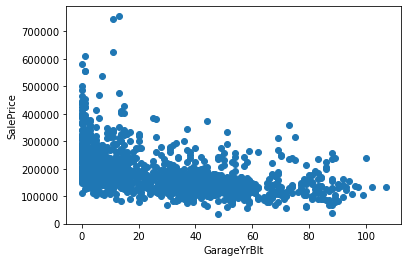

In [23]:
# Comparing difference between temporals and SalePrice

for temporal in temporals:
    if temporal != 'YrSold':
        data = train.copy()
        
        # Capturing difference b/w temporal and YrSold
        data[temporal] = data['YrSold'] - data[temporal]
        
        # Plotting scatter plot (age of temporal vs SalePrice)
        plt.scatter(data[temporal], data['SalePrice'])
        plt.xlabel(temporal)
        plt.ylabel('SalePrice')
        plt.show()

Conclusion: It seems that there is a some correlation between the age of the temporals and the sale price. 
- More recent bins in the temporals show higher sale prices
- Older temporal bins show lower sale prices

****Numerical Variables: Discrete and Continuous****

In [9]:
# Discrete features

# Creating list of discrete features (uses # of unique values (25) to indicate whether or not it is discrete)
discrete_feats = [feature for feature in num_feats if len(train[feature].unique()) < 25 and feature not in temporals + ['Id']]

print('Number of Discrete Features: {}'.format(len(discrete_feats)))

Number of Discrete Features: 17


In [25]:
discrete_feats

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [26]:
train[discrete_feats].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


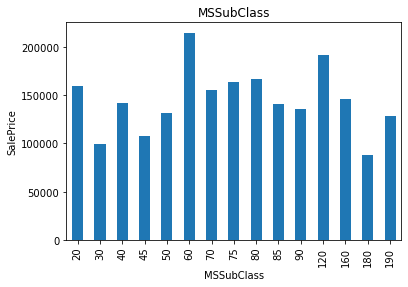

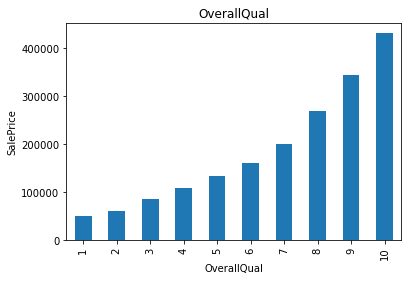

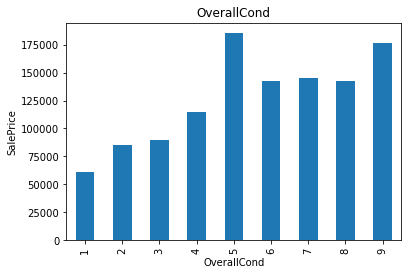

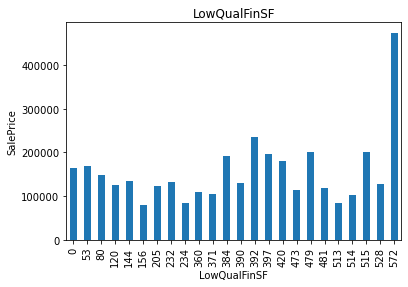

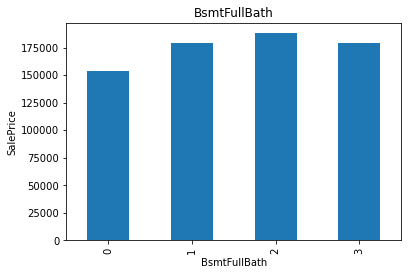

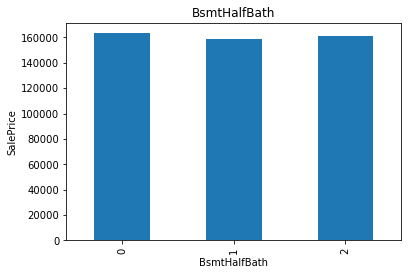

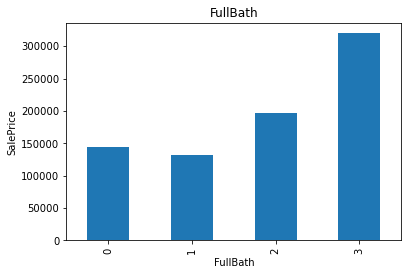

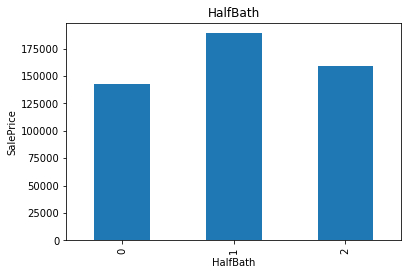

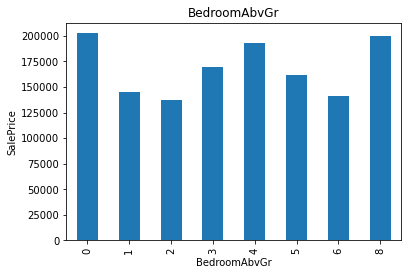

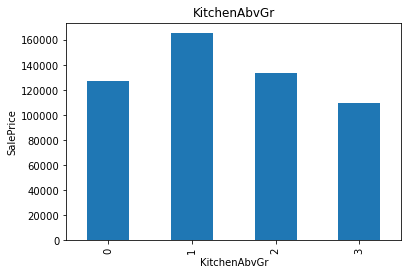

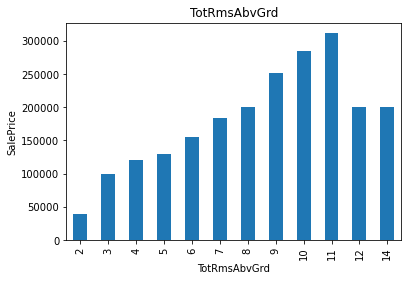

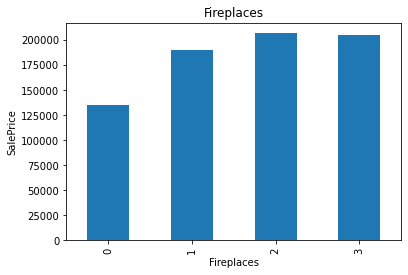

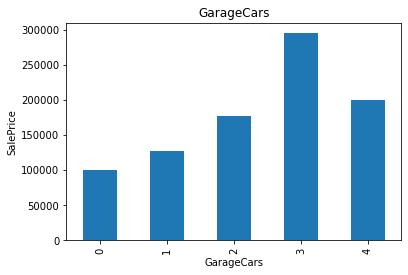

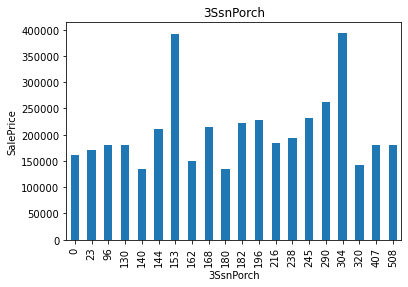

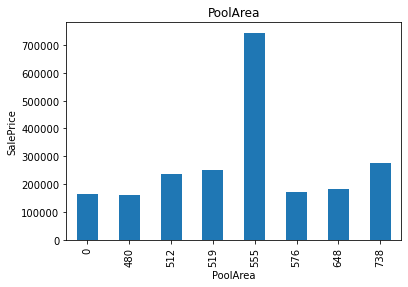

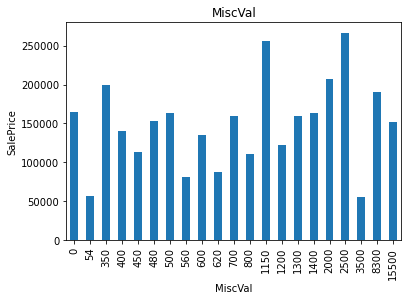

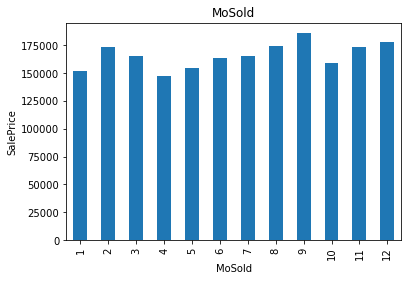

In [27]:
# Relationship between Discrete features and Sale Price

for feature in discrete_feats:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Conlcusion:
- Discrete Features with positive correlations to SalePrice: OverallQUal, OverallCond, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars
- Discrete Features with Positive Monotonic relationship: OverallQuall, FullBath, GarageCars (exponential increase to price for these features)

****Continuous Variables****

In [10]:
# Creating List of continuous features
continuous_feats = [feature for feature in num_feats if feature not in discrete_feats+temporals+['Id'] ]

print('Number of Continuous features: {}'.format(len(continuous_feats)))

Number of Continuous features: 16


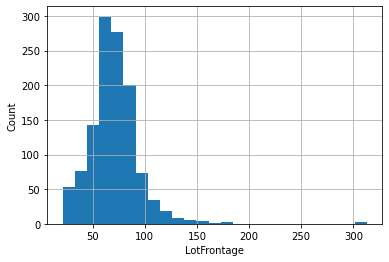

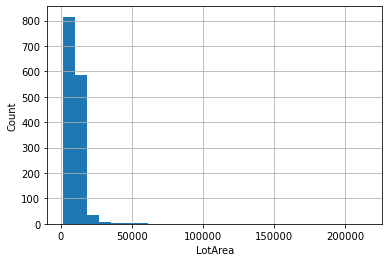

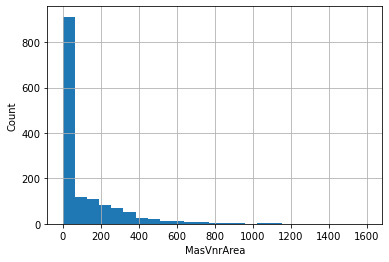

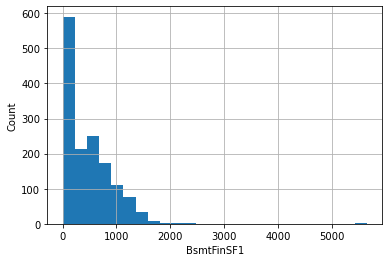

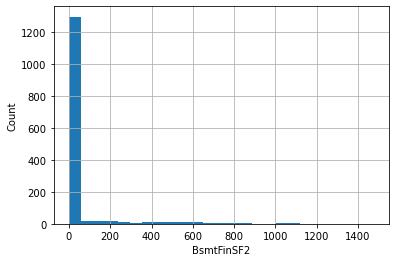

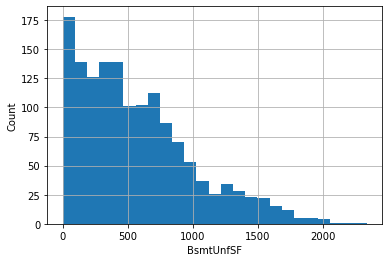

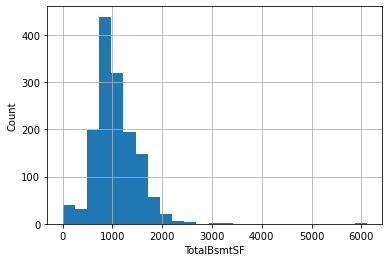

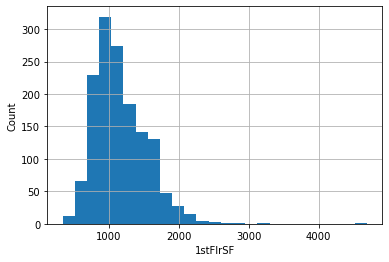

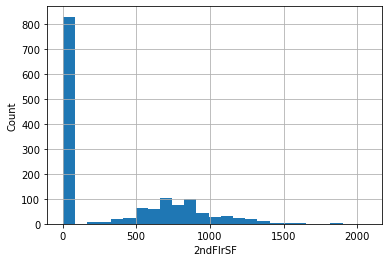

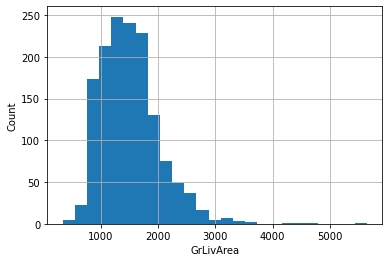

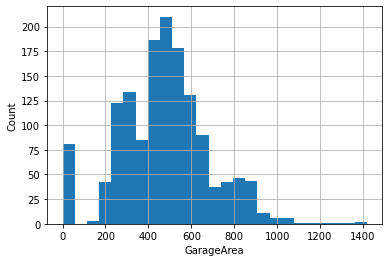

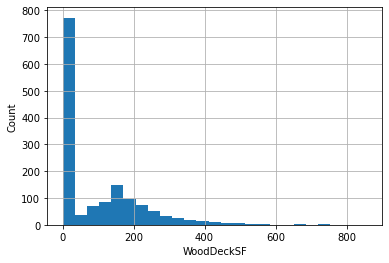

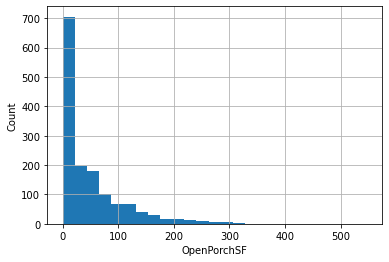

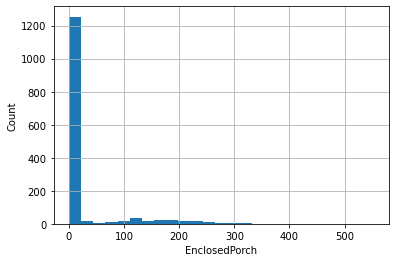

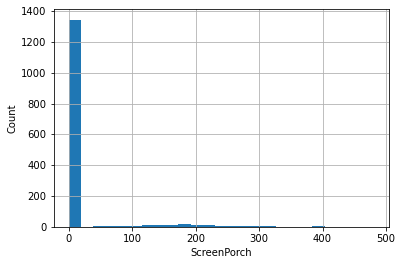

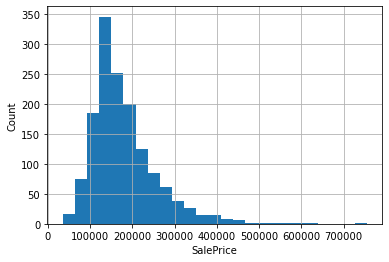

In [30]:
# Analyzing continuous features with historgrams to see distributions

for feature in continuous_feats:
    data = train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Conclusion: 
- Skewed features needs transformation
- Skewed features: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtfinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSf, 2ndFlSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, SalePrice
- GarageArea looks normalized, but has outliers that skew the data
- further graphical and statistical analysis is needed to check for normalized of skewed

QQ Plot
- "This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution." (reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- the resulting points are plotted on a scatter plot 
- deviations from the line indicate deviation from the expected distribution (if noramlized)

In [31]:
#Quantitle-QuantilePlot (QQ Plot) for all continuous features

#importing QQ Plot
from statsmodels.graphics.gofplots import qqplot

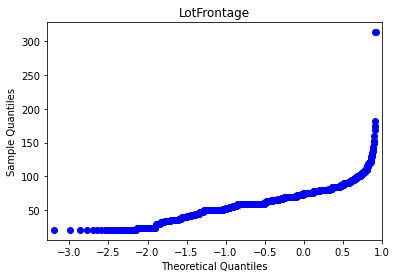

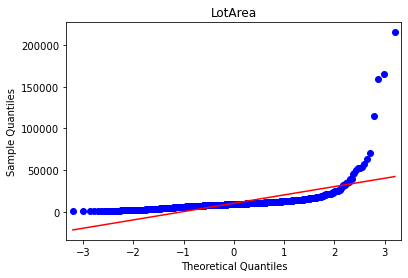

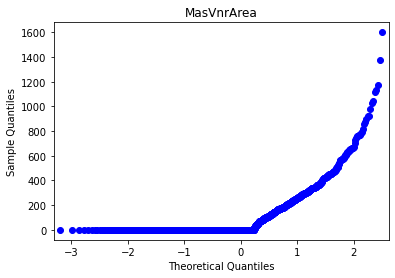

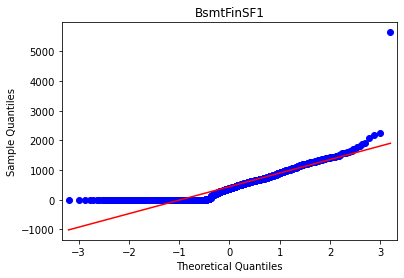

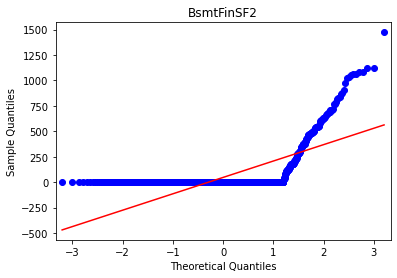

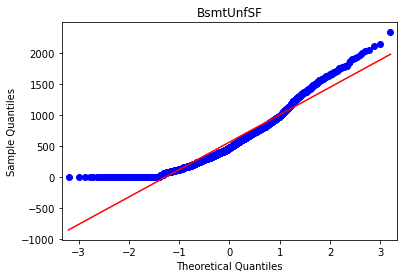

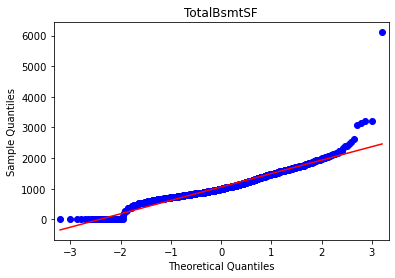

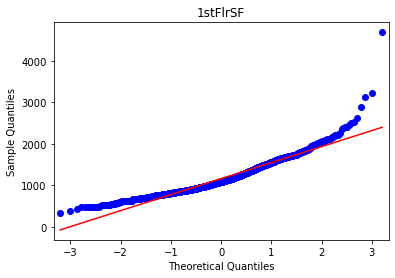

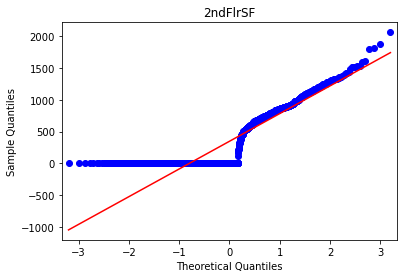

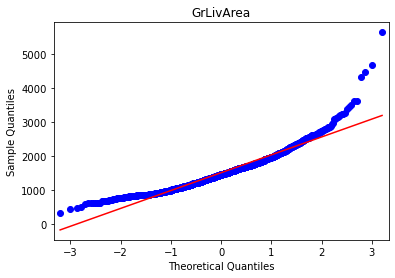

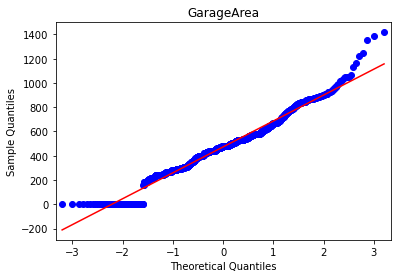

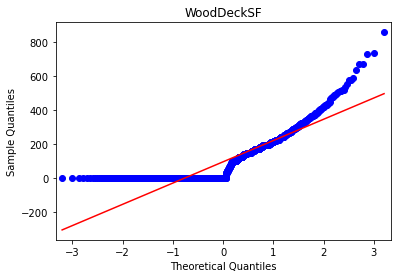

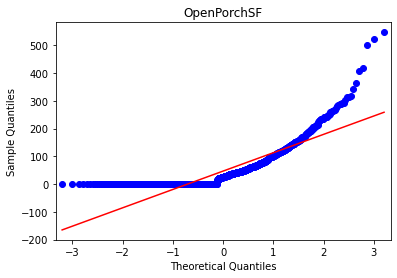

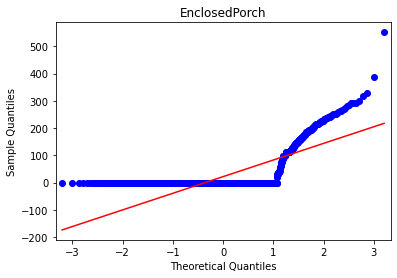

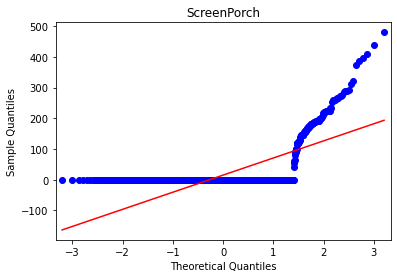

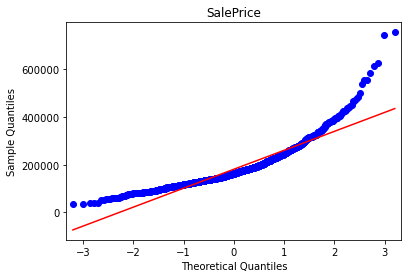

In [32]:
for feature in continuous_feats:
    qqplot(train[feature], line='s')
    plt.title(feature)
    plt.show()

Statistical Normality Tests
- Methods
    1. Shapiro-Wilk Test
    2. D’Agostino’s K^2 Test
    3. Anderson-Darling Test

Interpretations
- Each method produces two things:
    1. Statistic: A quantity calcualted by the test that can be interpreted in teh context of the test via comparing it to critical values from the distribution of the test statistic
    2. P-value: Used to interpret the test, in this case whether the sample was drawn from a Guassian distribution
- "Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications."
- "The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value."
- You can Interpret the P-Value as this:
    - p-value <= alpha (5% or 0.05): reject null hypothesis (H0), not normal
    - p-value > alpha (5% or 0.05): fail to reject null hypothesis (H0), normal

****Shapiro-Wilk Test****

"The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value."

In [33]:
#importing
from scipy.stats import shapiro

In [34]:
for feature in continuous_feats:
    stat, p = shapiro(train[feature])
    print(feature)
    print('Statistics= %.3f, p=%.3f' %(stat, p))
    alpha = 0.05
    if p > alpha:
        print(feature, 'is normal')
    else:
        print(feature, 'is not normal')
    print('-------------------------------------------------')

LotFrontage
Statistics= nan, p=1.000
LotFrontage is normal
-------------------------------------------------
LotArea
Statistics= 0.351, p=0.000
LotArea is not normal
-------------------------------------------------
MasVnrArea
Statistics= nan, p=1.000
MasVnrArea is normal
-------------------------------------------------
BsmtFinSF1
Statistics= 0.848, p=0.000
BsmtFinSF1 is not normal
-------------------------------------------------
BsmtFinSF2
Statistics= 0.327, p=0.000
BsmtFinSF2 is not normal
-------------------------------------------------
BsmtUnfSF
Statistics= 0.930, p=0.000
BsmtUnfSF is not normal
-------------------------------------------------
TotalBsmtSF
Statistics= 0.917, p=0.000
TotalBsmtSF is not normal
-------------------------------------------------
1stFlrSF
Statistics= 0.927, p=0.000
1stFlrSF is not normal
-------------------------------------------------
2ndFlrSF
Statistics= 0.767, p=0.000
2ndFlrSF is not normal
-------------------------------------------------
GrLivAr

Shapiro-Wilk Test conclusion:
- All features are not normal
- the features that are normal, have NaN stats (needs further analysis)
- redo test after cleaning data in feature engineering

****D'Agostino's K^2 Test****

""""
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

- Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
- Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

(reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
""""

In [35]:
#importing
from scipy.stats import normaltest

In [36]:
for feature in continuous_feats:
    stat, p = normaltest(train[feature])
    print(feature)
    print('Statistics= %.3f, p=%.3f' %(stat, p))
    alpha = 0.05
    if p > alpha:
        print(feature, 'is normal')
    else:
        print(feature, 'is not normal')
    print('-------------------------------------------------')

LotFrontage
Statistics= nan, p=nan
LotFrontage is not normal
-------------------------------------------------
LotArea
Statistics= 2590.592, p=0.000
LotArea is not normal
-------------------------------------------------
MasVnrArea
Statistics= nan, p=nan
MasVnrArea is not normal
-------------------------------------------------
BsmtFinSF1
Statistics= 638.287, p=0.000
BsmtFinSF1 is not normal
-------------------------------------------------
BsmtFinSF2
Statistics= 1287.444, p=0.000
BsmtFinSF2 is not normal
-------------------------------------------------
BsmtUnfSF
Statistics= 163.646, p=0.000
BsmtUnfSF is not normal
-------------------------------------------------
TotalBsmtSF
Statistics= 622.895, p=0.000
TotalBsmtSF is not normal
-------------------------------------------------
1stFlrSF
Statistics= 461.007, p=0.000
1stFlrSF is not normal
-------------------------------------------------
2ndFlrSF
Statistics= 163.142, p=0.000
2ndFlrSF is not normal
-------------------------------------

D’Agostino’s K^2 Test conclusion:
- All features are not normal
- the features that are normal, have NaN stats (needs further analysis)
- redo test after cleaning data in feature engineering

****Anderson-Darling Test****

""""
Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

(reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
""""

In [37]:
#importing 
from scipy.stats import anderson

In [38]:
for feature in continuous_feats:
    result = anderson(train[feature])
    print(feature)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal' % (sl, cv))
    print('---------------------------------------------------------------')

LotFrontage
Statistic: nan
15.000: 0.574, data does not look normal
10.000: 0.654, data does not look normal
5.000: 0.785, data does not look normal
2.500: 0.916, data does not look normal
1.000: 1.089, data does not look normal
---------------------------------------------------------------
LotArea
Statistic: 198.418
15.000: 0.574, data does not look normal
10.000: 0.654, data does not look normal
5.000: 0.785, data does not look normal
2.500: 0.916, data does not look normal
1.000: 1.089, data does not look normal
---------------------------------------------------------------
MasVnrArea
Statistic: nan
15.000: 0.574, data does not look normal
10.000: 0.654, data does not look normal
5.000: 0.785, data does not look normal
2.500: 0.916, data does not look normal
1.000: 1.089, data does not look normal
---------------------------------------------------------------
BsmtFinSF1
Statistic: 49.493
15.000: 0.574, data does not look normal
10.000: 0.654, data does not look normal
5.000: 0.78

Anderson-Darling Test conclusion:
- All features are not normal
- the features that are normal, have NaN stats (needs further analysis)
- redo test after cleaning data in feature engineering

****Visualizing transformations****
- I will transform continuous features to log (features with 0 get square root transformation)
- for features that are still skewed, I will analyze further and transform accordingly

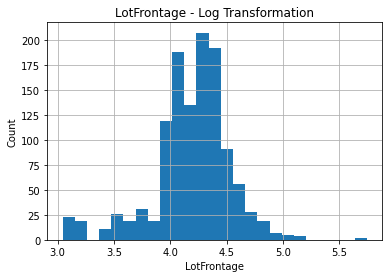

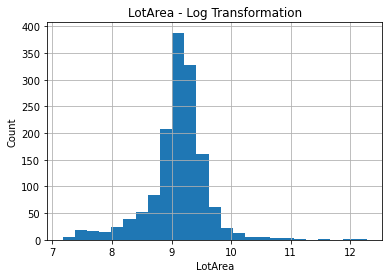

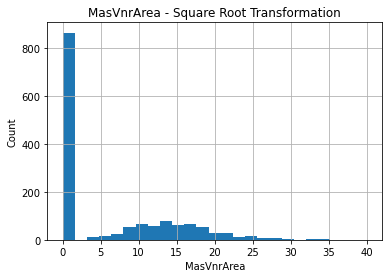

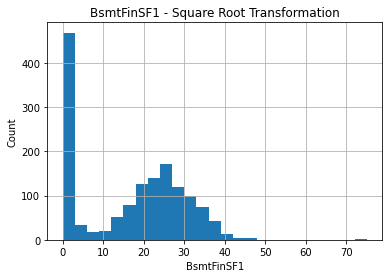

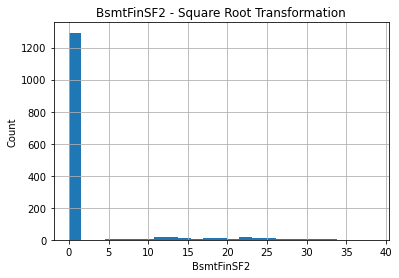

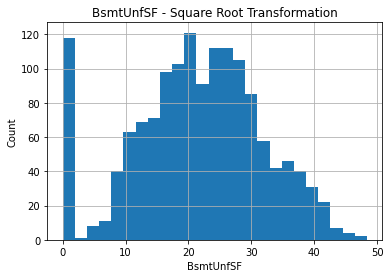

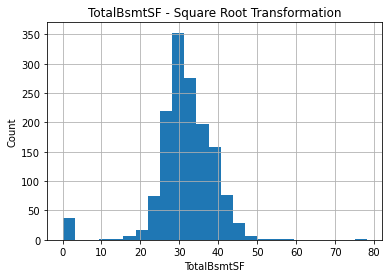

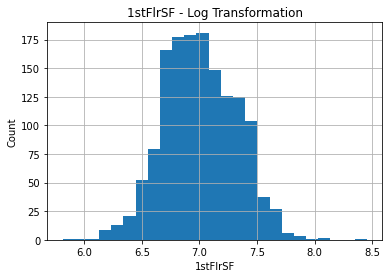

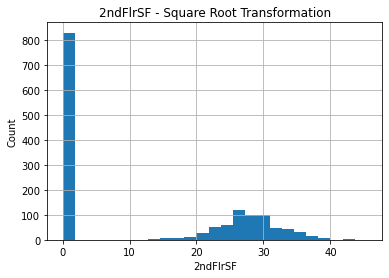

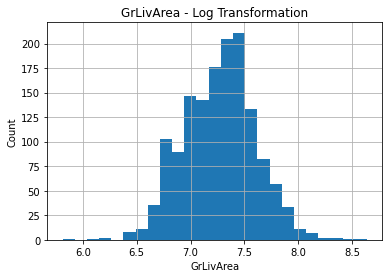

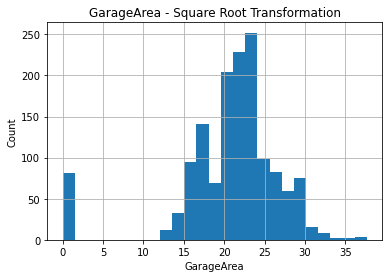

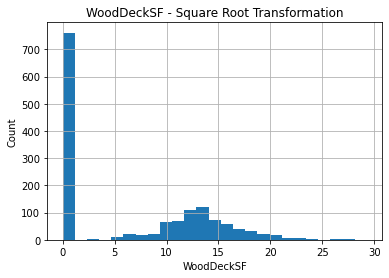

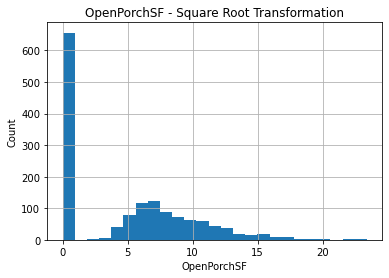

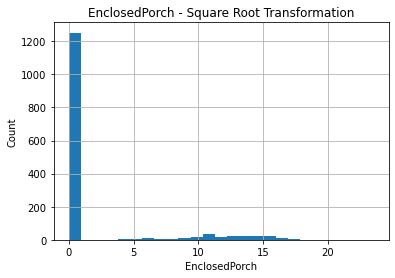

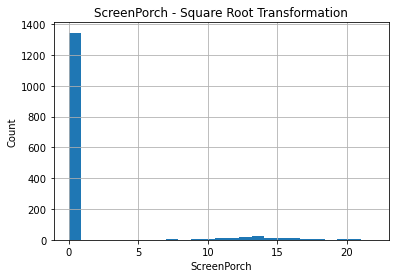

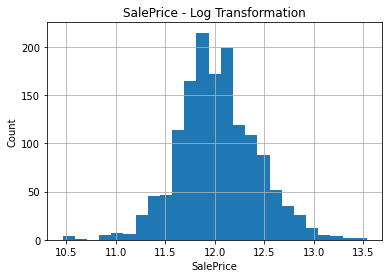

In [39]:
# Visualzing Log Transformation or Square Root Transformation

for feature in continuous_feats:
    data = train.copy()
    method = ''
    if 0 in data[feature].unique():
        method = 'Square Root Transformation'
        data[feature] = (data[feature])**(0.5)
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(str(feature)+' - '+ method)
        plt.show()
    else:
        method = 'Log Transformation'
        data[feature] = np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(str(feature)+' - '+ method)
        plt.show()

In [40]:
# Shapiro test on new transformed data
for feature in continuous_feats:
    tranformed_data = train.copy()
    method = ''
    if 0 in tranformed_data[feature].unique():
        method = 'Square Root Transformation'
        tranformed_data[feature] = (tranformed_data[feature])**(0.5)
        stat, p = shapiro(tranformed_data[feature])
        print(str(feature)+' - '+ method)
        print('Statistics= %.3f, p=%.3f' %(stat, p))
        alpha = 0.05
        if p > alpha:
            print(feature, 'is normal')
        else:
            print(feature, 'is not normal')
        print('-------------------------------------------------')
    else:
        method = 'Log Transformation'
        tranformed_data[feature] = np.log(tranformed_data[feature])
        stat, p = shapiro(tranformed_data[feature])
        print(str(feature)+' - '+ method)
        print('Statistics= %.3f, p=%.3f' %(stat, p))
        alpha = 0.05
        if p > alpha:
            print(feature, 'is normal')
        else:
            print(feature, 'is not normal')
        print('-------------------------------------------------')

#for feature in continuous_feats:
    #stat, p = shapiro(tranformed_data[feature])
    #print(feature)
    #print('Statistics= %.3f, p=%.3f' %(stat, p))
    #alpha = 0.05
    #if p > alpha:
        #print(feature, 'is normal')
    #else:
        #print(feature, 'is not normal')
    #print('-------------------------------------------------')
    
tranformed_data.head()

LotFrontage - Log Transformation
Statistics= nan, p=1.000
LotFrontage is normal
-------------------------------------------------
LotArea - Log Transformation
Statistics= 0.905, p=0.000
LotArea is not normal
-------------------------------------------------
MasVnrArea - Square Root Transformation
Statistics= nan, p=1.000
MasVnrArea is normal
-------------------------------------------------
BsmtFinSF1 - Square Root Transformation
Statistics= 0.879, p=0.000
BsmtFinSF1 is not normal
-------------------------------------------------
BsmtFinSF2 - Square Root Transformation
Statistics= 0.378, p=0.000
BsmtFinSF2 is not normal
-------------------------------------------------
BsmtUnfSF - Square Root Transformation
Statistics= 0.979, p=0.000
BsmtUnfSF is not normal
-------------------------------------------------
TotalBsmtSF - Square Root Transformation
Statistics= 0.869, p=0.000
TotalBsmtSF is not normal
-------------------------------------------------
1stFlrSF - Log Transformation
Statisti

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


note: 
- need to impute null values before transformation and normalization

### Outliers 

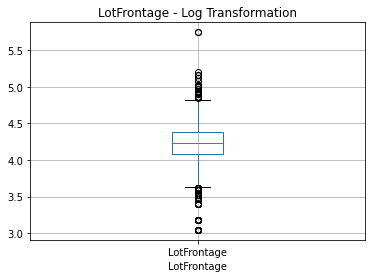

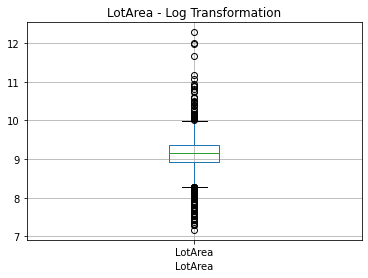

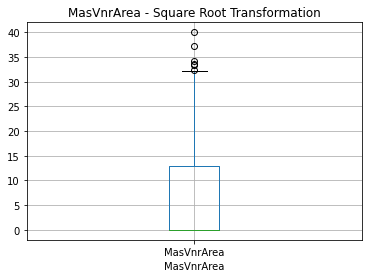

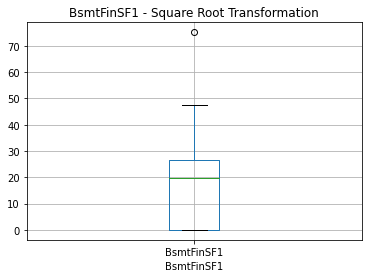

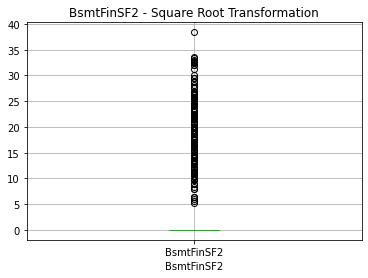

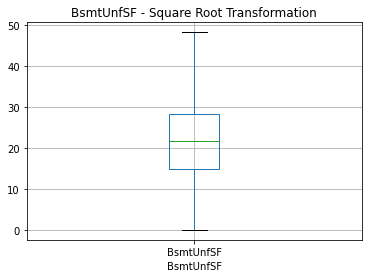

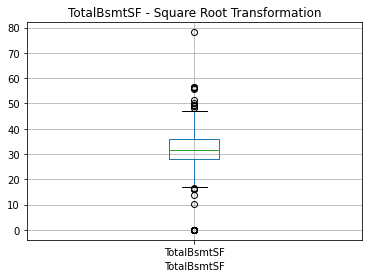

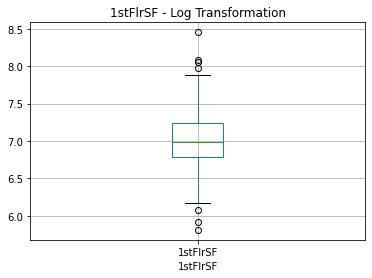

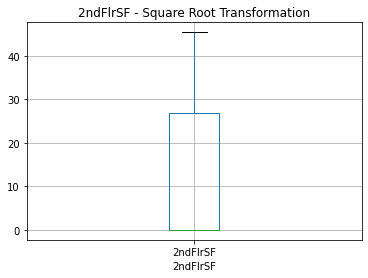

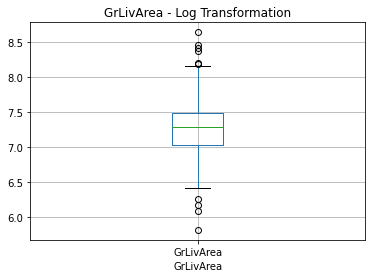

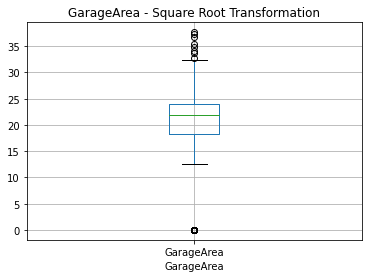

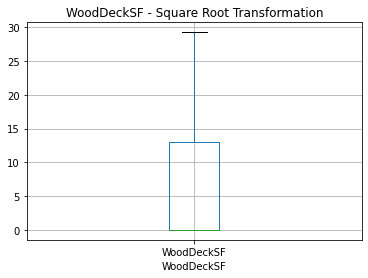

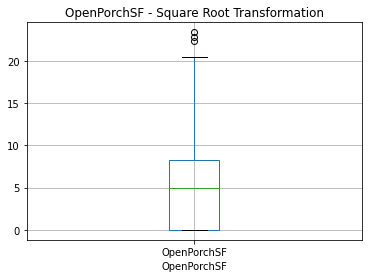

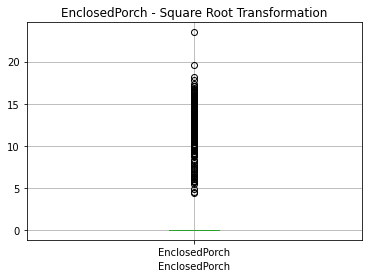

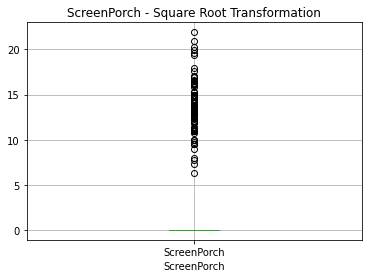

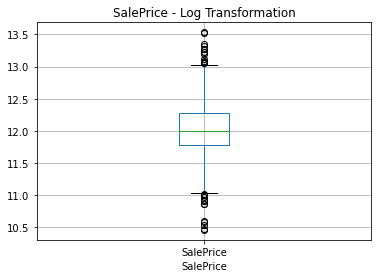

In [41]:
for feature in continuous_feats:
    data = train.copy()
    method = ''
    if 0 in data[feature].unique():
        method = 'Square Root Transformation'
        data[feature] = (data[feature])**(0.5)
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.title(str(feature)+' - '+ method)
        plt.show()
    else:
        method = 'Log Transformation'
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.title(str(feature)+' - '+ method)
        plt.show()


****Categorical Varibales****

In [11]:
cat_feats = [feature for feature in train.columns if train[feature].dtypes == 'O']

print('Number of Categorical Features: {}'.format(len(cat_feats)))

Number of Categorical Features: 43


In [80]:
train[cat_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [43]:
for feature in cat_feats:
    num_cats = len(train[feature].unique())
    print('{} has {} categories'.format(feature, num_cats))

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
MasVnrType has 5 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 6 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

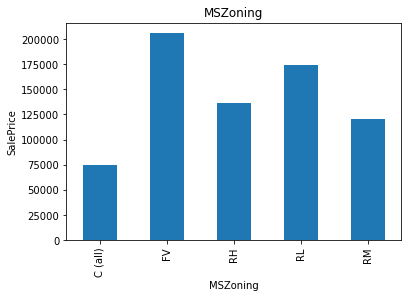

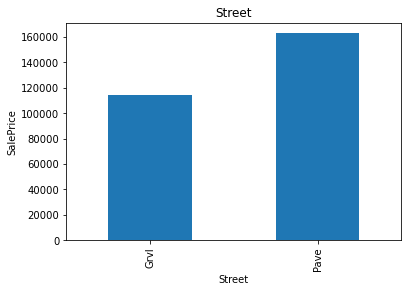

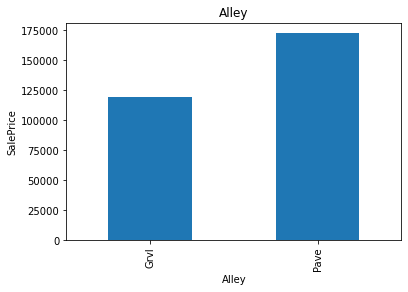

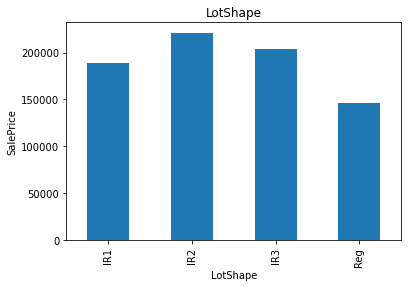

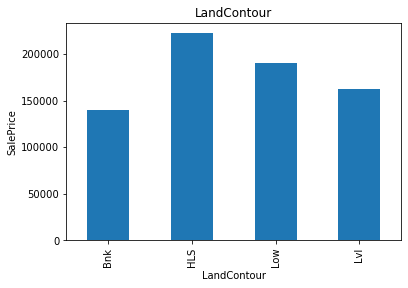

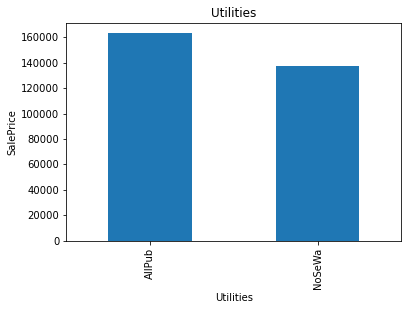

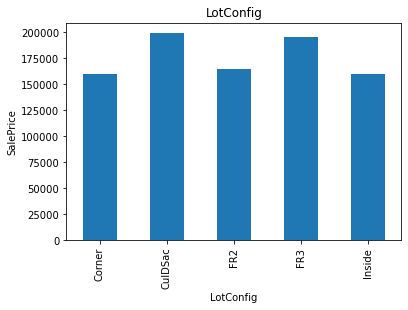

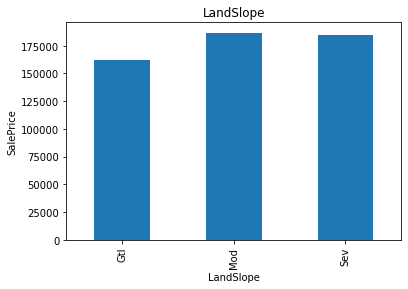

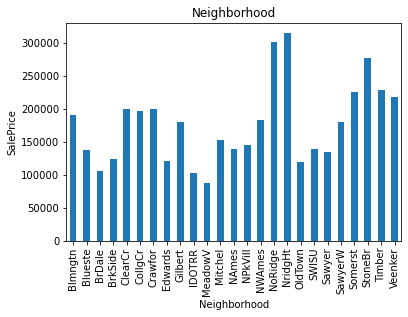

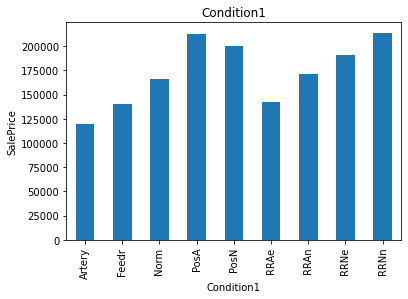

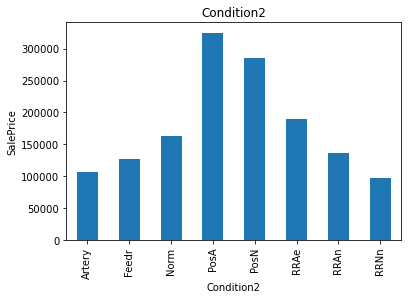

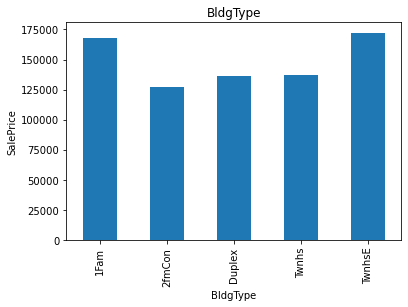

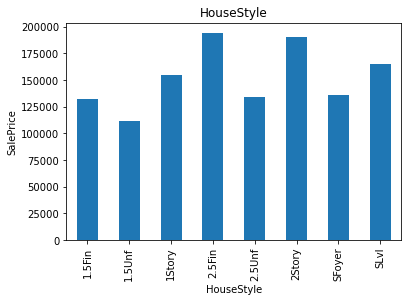

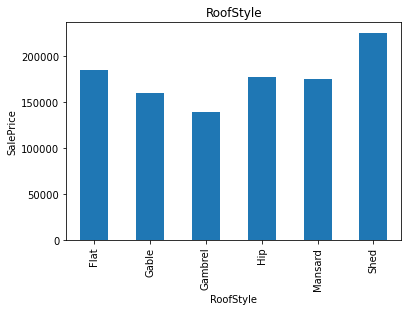

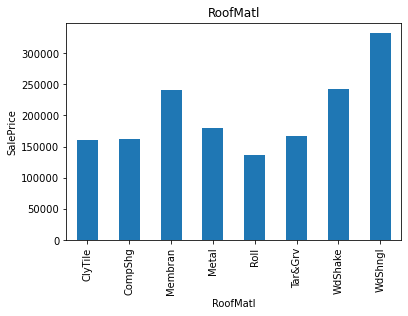

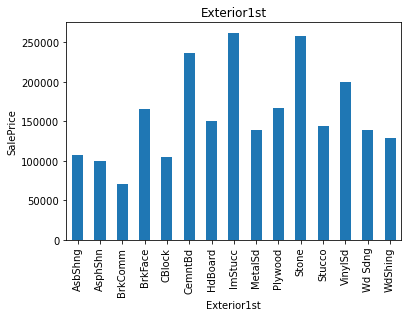

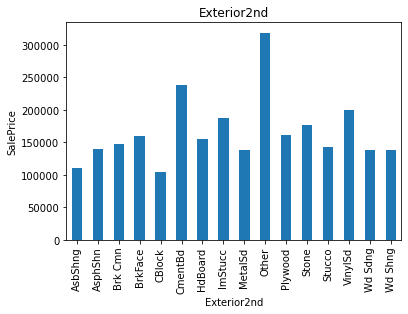

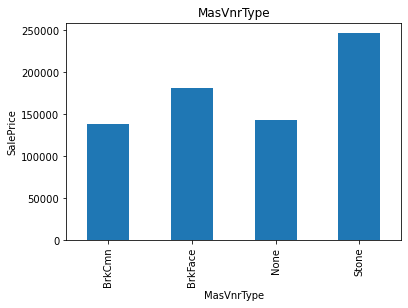

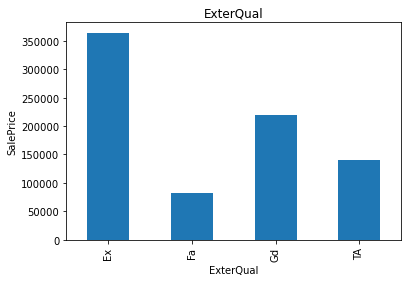

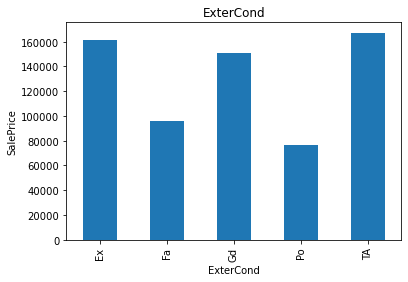

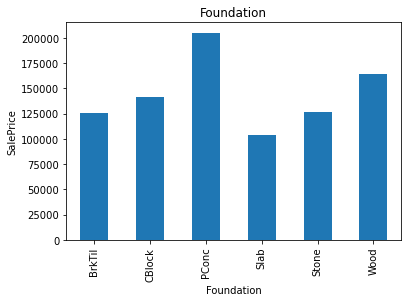

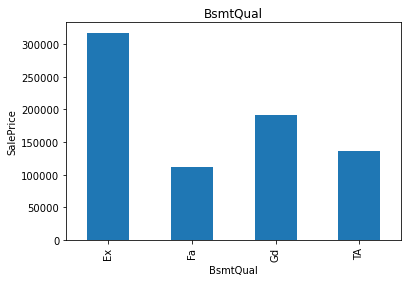

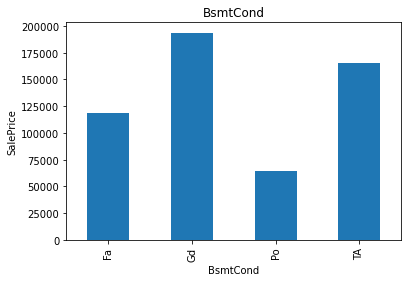

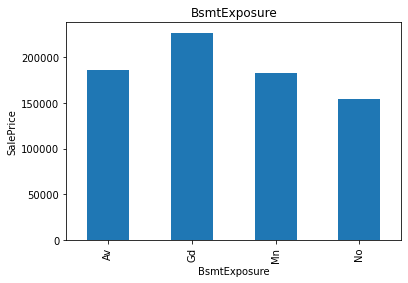

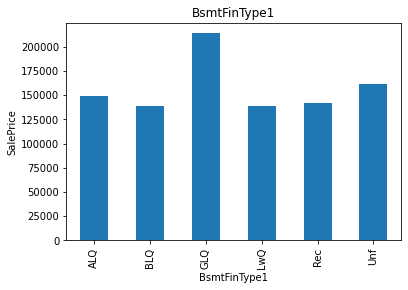

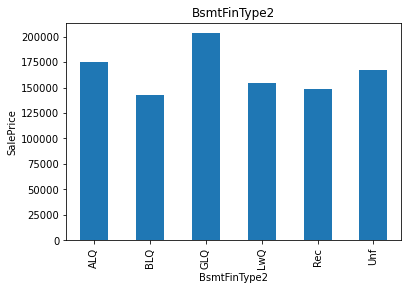

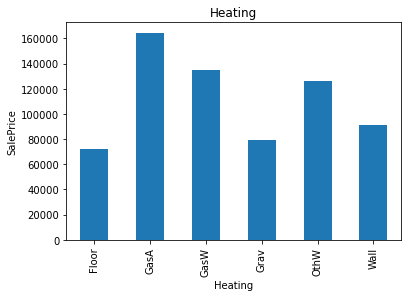

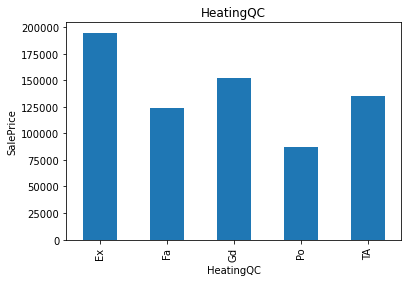

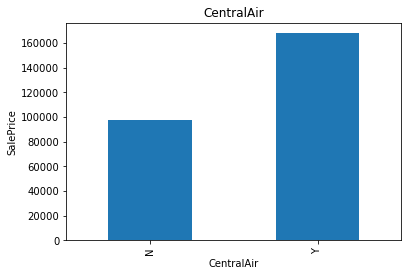

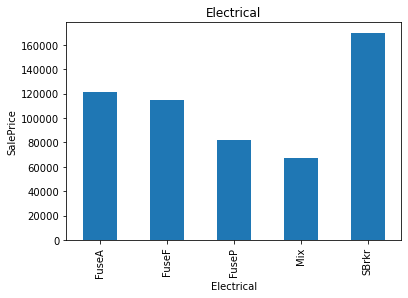

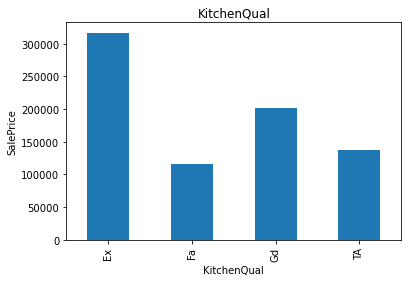

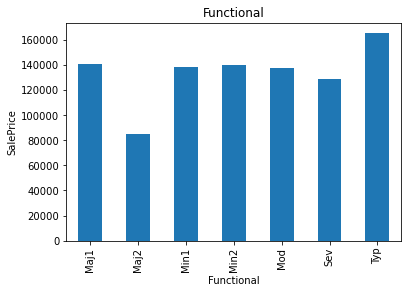

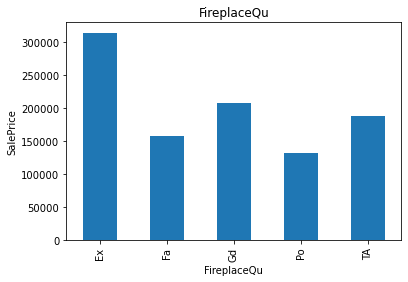

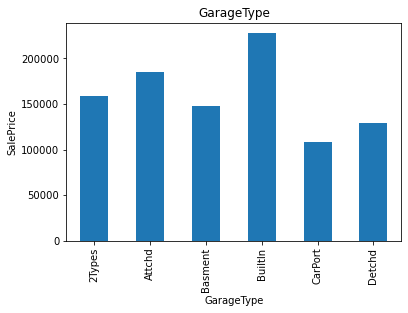

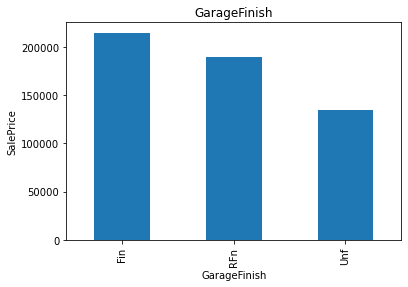

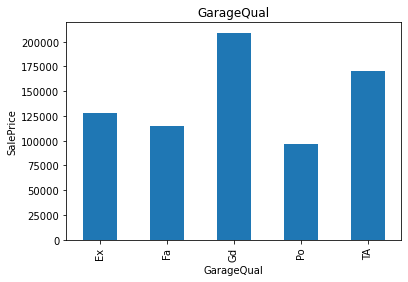

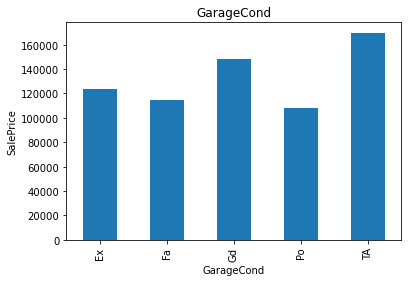

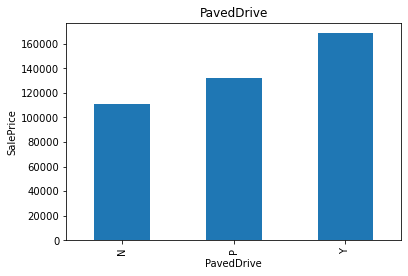

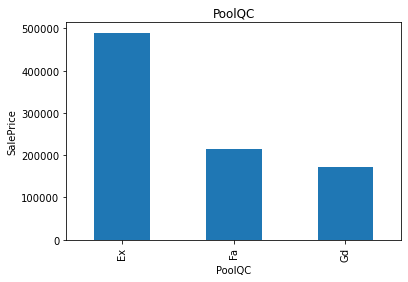

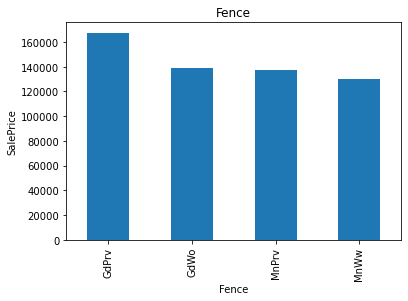

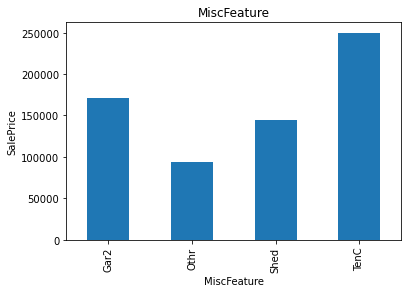

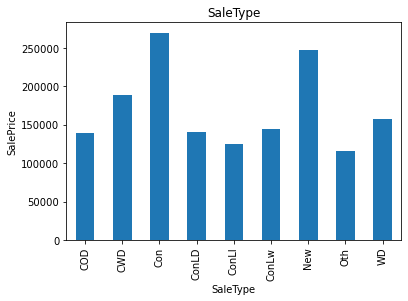

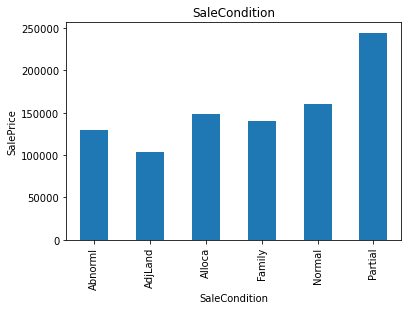

In [44]:
# Relationship between Categorical features and SalePrice (dependent feature)

for feature in cat_feats:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Feature Engineering

****Feature Engineering Goals****
1. handle missing values
2. handle temporal variables
3. Categorical variables: remove rare labels
4. Standardize the values of the variables to the same range (transform)

****note: It's proper to split data FIRST into test and training data and perform feature engineering separately on both training and test data to prevent data leakage, but kaggle provides test data and train data****

****1. Missing Values****

- Categorical features

In [15]:
# checking percentage of NaN values present in each categorical feature
for feature in cat_feats:
    missing = np.round(train[feature].isnull().mean(), 4)
    if missing > 0:
        print(feature, round(missing*100,2), '% NaN')

In [13]:
# Filling MSZoning NaN values with mode, grouped by MSSubClass
train['MSZoning'] = train.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [118]:
# Function to replace missing values with 'None'
# since the rest of the featuers with NaN indicate lack of existence of feature
#def replace_cat_na(train, cat_feats):
    #data = train.copy()
    #data[cat_feats] = data[cat_feats].fillna('None')
    #return data

# Using funciton to replace missing values with 'None'
#train = replace_cat_na(train, cat_feats)

#check
#train[cat_feats].isnull().sum()

In [14]:
# replacing NaN Values for categorical variables with 'none' or mode
train['Alley'].fillna('none', axis=0,inplace=True)
train['Utilities'].fillna(train['Utilities'].mode()[0], inplace=True)
train['Exterior1st'].fillna(train['Exterior1st'].mode()[0], inplace=True)
train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0], inplace=True)
train['MasVnrType'].fillna('none', axis=0,inplace=True)
train['BsmtQual'].fillna('none', axis=0,inplace=True)
train['BsmtCond'].fillna('none', axis=0,inplace=True)
train['BsmtExposure'].fillna('none', axis=0,inplace=True)
train['BsmtFinType1'].fillna('none', axis=0,inplace=True)
train['BsmtFinType2'].fillna('none', axis=0,inplace=True)
train['Electrical'].fillna('SBrkr', axis=0,inplace=True) #mode didn't work?
train['Functional'].fillna(train.Functional.mode()[0], axis=0,inplace=True)
train['FireplaceQu'].fillna('none', axis=0,inplace=True)
train['KitchenQual'].fillna(train.KitchenQual.mode()[0], axis=0,inplace=True)
train['GarageType'].fillna('none', axis=0,inplace=True)
train['GarageFinish'].fillna('none', axis=0,inplace=True)
train['GarageQual'].fillna('none', axis=0,inplace=True)
train['GarageCond'].fillna('none', axis=0,inplace=True)
train['PoolQC'].fillna('none', axis=0,inplace=True)
train['Fence'].fillna('none', axis=0,inplace=True)
train['MiscFeature'].fillna('none', axis=0,inplace=True)
train['SaleType'].fillna(train.SaleType.mode()[0], axis=0,inplace=True)

 - Numerical variables

In [22]:
# checking percentage of NaN values present in each numerical feature
for feature in num_feats:
    missing = np.round(train[feature].isnull().mean(), 4)
    if missing > 0:
        print(feature, round(missing*100,2), '% NaN')

In [17]:
#FullBath, HalfBath, BsmtFullBath, BsmtHalfBath ==> # Bathrooms
train['Bathrooms'] = (train['FullBath'] + (train['HalfBath'])/2 + train['BsmtFullBath'] + 
                        (train['BsmtHalfBath'])/2).astype('float64')
# Adding total sqfootage 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [18]:
# LotFrontage ==> Usually neighborhoods have the same lotfrontage
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [19]:
#GarageArea ==> filling NA with median of GarageType group (works because only single missing na where the garage is Detached)
train['GarageArea'] = train.groupby('GarageType')['GarageArea'].transform(lambda x: x.fillna(x.median()))
#Same thing with GarageCars
train['GarageCars'] = train.groupby('GarageType')['GarageCars'].transform(lambda x: x.fillna(x.median()))

# This cell contains code from another notebook that dealt with the same data but used on a concatanated 
# dataset of the training and testing data, which had null values for GarageArea, and GarageCars
# This cell is just to save for when I clean and feature engineer the test data separately


In [20]:
#Filling missing values with median/mean/0 for numerical data
train['MasVnrArea'].fillna(0, axis=0, inplace=True)

In [21]:
# making missing values in GarageYrBuilt = YrSold
# in order to not hinder the next sections calculations
train['GarageYrBlt'].fillna(train['YrSold'], axis=0, inplace=True)

- Temporal Variables

In [23]:
#GarageYrBlt ==> replacing impossible value with plausible value
df.loc[df['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [24]:
#creating AgeSold feature
train['AgeSold'] = train['YrSold'] - train['YearBuilt']

#check
train['AgeSold'].head(3)

0     5
1    31
2     7
Name: AgeSold, dtype: int64

In [57]:
# replacing all year values with number of years from year sold
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    train[feature] = train['YrSold'] - train[feature]
# Check
train[temporals].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


****Final Check****

In [25]:
# creating missing values count variable
missing_values_count = train.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print('percent of missing cell values: '+ str(percent_missing)+'%')

percent of missing cell values: 0.0%


****Transforming Numerical Features to Log****

In [26]:
nums = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in nums:
    train[feature] = np.log(train[feature])

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms,AgeSold
0,1,60,RL,4.174387,9.041922,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247694,3.5,5
1,2,20,RL,4.382027,9.169518,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109011,2.5,31
2,3,60,RL,4.219508,9.328123,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317167,3.5,7
3,4,70,RL,4.094345,9.164296,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849398,2.0,91
4,5,60,RL,4.430817,9.565214,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429216,3.5,8


- Correaltions after transformations

In [28]:
df_num = train.select_dtypes(include=[np.number])
corr = train.corr()
corr.sort_values(['SalePrice'],ascending=False,inplace=True)
corr['SalePrice']

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.730255
GarageCars       0.680625
Bathrooms        0.673011
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.608947
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
LotArea          0.399918
GarageYrBlt      0.394528
BsmtFinSF1       0.372023
LotFrontage      0.361272
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorc

****Rare Labels****

In [61]:
for feature in cat_feats:
    temp = train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df = temp[temp > 0.01].index
    train[feature] = np.where(train[feature].isin(temp_df), train[feature],'Rare_var')

In [62]:
train[train['MSZoning'] == 'Rare_var']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms,AgeSold
30,31,70,Rare_var,3.912023,9.047821,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,88,58,Rare_var,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,6.475433,668,0,7.183112,0,0,1,0,3,1,TA,6,Typ,0,none,Detchd,88.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,none,MnPrv,none,0,7,2008,WD,Normal,10.596635,1.0,88
88,89,50,Rare_var,4.653960,9.044286,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Rare_var,1Fam,1.5Fin,3,2,94,27,Hip,CompShg,Plywood,Plywood,None,0.0,Rare_var,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,6.920672,0,513,7.330405,0,0,1,0,2,1,Fa,6,Typ,0,none,none,0.0,none,0,0,none,none,N,0,0,156,0,0,0,none,MnPrv,none,0,10,2009,Rare_var,Abnorml,11.350407,1.0,94
93,94,190,Rare_var,4.094345,8.881836,Pave,none,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,Rare_var,6,6,97,9,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,7.138867,1031,0,7.736744,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,107.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,none,none,none,0,11,2007,WD,Normal,11.804849,2.5,97
495,496,30,Rare_var,4.094345,8.971956,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,89,59,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,6.579251,0,0,6.579251,0,0,1,0,2,1,TA,4,Typ,0,none,none,0.0,none,0,0,none,none,N,0,523,115,0,0,0,none,GdWo,none,0,11,2009,WD,Abnorml,10.460242,1.0,89
557,558,50,Rare_var,4.094345,9.309280,Pave,none,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,6,86,56,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,637,Unf,0,0,637,GasA,Gd,Y,SBrkr,6.799056,439,0,7.197435,0,0,1,1,3,1,TA,7,Typ,0,none,Rare_var,12.0,Unf,1,570,TA,TA,Y,0,47,120,0,0,0,none,none,none,0,9,2006,COD,Normal,11.589887,1.5,86
711,712,50,Rare_var,4.189655,9.072457,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,110,60,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Rare_var,TA,TA,Mn,Unf,0,Unf,0,859,859,GasA,Gd,Y,SBrkr,6.755769,319,0,7.071573,0,0,1,0,2,1,TA,7,Typ,0,none,Detchd,46.0,RFn,1,384,TA,TA,N,68,0,98,0,0,0,none,none,none,0,1,2010,WD,Abnorml,11.540307,1.0,110
812,813,20,Rare_var,4.189655,9.072457,Rare_var,none,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,58,58,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Rare_var,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,6.950815,0,0,6.950815,0,0,1,0,2,1,Fa,4,Typ,0,none,Basment,58.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,none,none,Shed,54,6,2010,WD,Rare_var,10.932982,1.0,58
916,917,20,Rare_var,3.912023,9.104980,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,57,56,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,6.173786,0,0,6.173786,1,0,0,0,1,1,TA,4,Typ,0,none,Detchd,48.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,none,none,none,0,10,2006,WD,Abnorml,10.471950,1.0,57
1061,1062,30,Rare_var,4.787492,9.798127,Rare_var,none,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,73,58,Gable,CompShg,MetalSd,MetalSd,None,0.0,Rare_var,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,6

****Label Encoding****

In [29]:
#Importing encoder
from sklearn.preprocessing import LabelEncoder

In [30]:
cats = train.dtypes[train.dtypes=='object'].index
le = LabelEncoder()
for x in cats:
    train[x] = le.fit_transform(train[x])
    
#Check
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms,AgeSold
0,1,60,3,4.174387,9.041922,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,12.247694,3.5,5
1,2,20,3,4.382027,9.169518,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,12.109011,2.5,31
2,3,60,3,4.219508,9.328123,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,12.317167,3.5,7
3,4,70,3,4.094345,9.164296,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,11.849398,2.0,91
4,5,60,3,4.430817,9.565214,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,12.429216,3.5,8


****Feature Scaling****

In [31]:
feature_scale = [feature for feature in train.columns if feature not in ['Id','SalePrice']]

#Using minmax scaler (based on scale 0 to 1) as opposed to standard scaler (based on standard normal distribution) because there aren't many negative values
# also, according to Krish Naik, minmax scaler performed better

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])

MinMaxScaler()

In [32]:
# transforming the training set
data = pd.concat([train[['Id','SalePrice']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(train[feature_scale]), 
                              columns=feature_scale)], axis=1)

In [33]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bathrooms,AgeSold
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.949275,0.883333,0.2,0.142857,0.857143,0.866667,0.25,0.12250,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.125089,0.833333,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,0.166667,0.936364,0.333333,0.50,0.386460,0.8,0.8,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8,0.5,0.036765
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.142857,0.571429,0.533333,0.50,0.00000,1.000000,1.0,0.2,0.50,0.75,0.25,0.000000,0.173281,0.833333,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.166667,0.690909,0.333333,0.50,0.324401,0.8,0.8,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8,0.3,0.227941
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.934783,0.866667,0.2,0.142857,0.857143,0.866667,0.25,0.10125,0.666667,1.0,0.4,0.50,0.75,0.50,0.333333,0.086109,0.833333,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.166667,0.918182,0.333333,0.50,0.428773,0.8,0.8,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8,0.5,0.051471
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.311594,0.333333,0.2,0.142857,0.928571,1.000000,0.50,0.00000,1.000000,1.0,0.0,0.75,0.25,0.75,0.000000,0.038271,0.833333,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.833333,0.890909,0.666667,0.75,0.452750,0.8,0.8,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.0,0.2,0.669118
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.927536,0.833333,0.2,0.142857,0.857143,0.866667,0.25,0.21875,0.666667,1.0,0.4,0.50,0.75,0.00,0.333333,0.116052,0.833333,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.8,0.166667,0.909091,0.333333,0.75,0.589563,0.8,0.8,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8,0.5,0.058824


#### Machine Learning Models

- Splitting data

In [34]:
#dropping ID
data = data.drop(['Id'], axis = 1)

In [35]:
#Split training
from sklearn.model_selection import cross_val_score, train_test_split, KFold

X = data.drop(['SalePrice'], axis=1)
y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,test_size=0.2)

In [40]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bathrooms,AgeSold
666,0.235294,0.75,0.461171,0.519179,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.500000,0.25,0.285714,0.0,0.714286,0.555556,0.50,0.673913,0.483333,0.0,0.714286,0.642857,0.666667,0.00,0.070625,1.000000,0.5,0.2,0.50,0.75,0.75,0.500000,0.033133,0.666667,0.490502,0.047517,0.167103,0.2,1.00,1.0,1.00,0.559502,0.443099,0.0,0.694665,0.000000,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.416667,0.833333,0.333333,0.6,0.666667,0.590909,0.666667,0.50,0.420310,0.8,0.8,1.0,0.000000,0.484461,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.636364,0.25,1.0,0.0,0.3,0.308824
226,0.235294,0.75,0.504203,0.398325,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.625000,0.25,0.285714,0.0,0.714286,0.666667,0.50,0.891304,0.750000,0.2,0.142857,0.857143,0.866667,0.25,0.181250,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.100106,0.833333,0.000000,0.273116,0.196890,0.2,0.00,1.0,1.00,0.488381,0.632446,0.0,0.714884,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.8,0.166667,0.863636,0.333333,0.75,0.508463,0.8,0.8,1.0,0.261377,0.208410,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.454545,0.25,1.0,0.0,0.3,0.088235
155,0.176471,0.75,0.388581,0.391317,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.291667,0.00,0.285714,0.0,0.000000,0.555556,0.50,0.376812,0.000000,0.2,0.142857,0.928571,0.933333,0.50,0.000000,1.000000,1.0,0.0,0.75,0.75,0.75,0.833333,0.000000,0.833333,0.000000,0.244863,0.093617,0.6,0.25,0.0,0.25,0.203596,0.253753,0.0,0.420355,0.000000,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.000000,0.000000,1.0,1.000000,0.981818,1.000000,0.00,0.000000,1.0,1.0,0.0,0.000000,0.014625,0.231884,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.272727,0.50,1.0,0.8,0.0,0.617647
231,0.235294,0.75,0.782673,0.480455,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.625000,0.25,0.285714,0.0,0.714286,0.777778,0.50,0.891304,0.766667,0.2,0.142857,0.857143,0.866667,0.25,0.316250,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.122077,0.833333,0.000000,0.330908,0.239280,0.2,0.00,1.0,1.00,0.565906,0.631477,0.0,0.751397,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.000000,0.583333,1.000000,0.333333,0.8,0.166667,0.863636,0.000000,0.75,0.571227,0.8,0.8,1.0,0.000000,0.266910,0.365942,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.545455,0.75,1.0,0.8,0.5,0.102941
901,0.000000,0.75,0.412469,0.372320,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.500000,0.25,0.285714,0.0,0.285714,0.444444,0.75,0.615942,0.833333,0.6,0.142857,0.571429,0.533333,0.50,0.000000,1.000000,0.5,0.2,0.75,0.75,0.50,0.166667,0.152374,0.833333,0.000000,0.056507,0.162357,0.2,1.00,1.0,1.00,0.516025,0.000000,0.0,0.482368,0.333333,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.000000,0.000000,1.0,0.833333,0.618182,0.666667,0.25,0.533145,0.8,0.8,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.75,1.0,0.8,0.2,0.382353


In [37]:
#Importing metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

****Models:****
- RandomForestRegressor, ExtraTreeRegressor, AdaBoostRegressor

In [72]:
#import models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor

****RandomForestRegressor****

In [73]:
#RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

#Make Predicitons
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

#Training set performance
rfr_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
#rfr_train_score = rfr.score(y_train,y_train_pred) #Calculate score
rfr_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
rfr_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
#rfr_test_score = rfr.score(y_test, y_test_pred) #Calculate score
rfr_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % rfr.score(X_train,y_train))
print('- MSE: %s' % rfr_train_mse)
print('- MAE: %s' % rfr_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % rfr.score(X_test,y_test))
print('- MSE: %s' % rfr_test_mse)
print('- MAE: %s' % rfr_test_mae)

Model performance for Training set
- Score: 0.9819660707319365
- MSE: 0.002947115284843921
- MAE: 0.03657524969712808
------------------------------------
Model Performance for Test set
- Score: 0.8915918771983424
- MSE: 0.015560999455633365
- MAE: 0.08920258141523908


****ExtraTreesRegressor****

In [74]:
#ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)

#Make Predicitons
y_train_pred = etr.predict(X_train)
y_test_pred = etr.predict(X_test)

#Training set performance
etr_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
etr_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
etr_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
etr_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % etr.score(X_train,y_train))
print('- MSE: %s' % etr_train_mse)
print('- MAE: %s' % etr_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % etr.score(X_test,y_test))
print('- MSE: %s' % etr_test_mse)
print('- MAE: %s' % etr_test_mae)

Model performance for Training set
- Score: 1.0
- MSE: 2.0188355385395812e-28
- MAE: 1.140640093792969e-14
------------------------------------
Model Performance for Test set
- Score: 0.8939606677463722
- MSE: 0.015220981129738713
- MAE: 0.08800313573288651


****AdaBoostRegressor****

In [75]:
#AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

#Make Predicitons
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

#Training set performance
ada_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
ada_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
ada_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
ada_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % ada.score(X_train,y_train))
print('- MSE: %s' % ada_train_mse)
print('- MAE: %s' % ada_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % ada.score(X_test,y_test))
print('- MSE: %s' % ada_test_mse)
print('- MAE: %s' % ada_test_mae)

Model performance for Training set
- Score: 0.8513856455563782
- MSE: 0.024286644858014413
- MAE: 0.12773898127770858
------------------------------------
Model Performance for Test set
- Score: 0.7925004864334637
- MSE: 0.029784666814687142
- MAE: 0.1306100888259427


****ElasticNetCV****

In [76]:
#Importing model
from sklearn.linear_model import ElasticNetCV

In [77]:
#ElasticNetCV
net = ElasticNetCV()
net.fit(X_train,y_train)

#Make Predicitons
y_train_pred = net.predict(X_train)
y_test_pred = net.predict(X_test)

#Training set performance
net_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
net_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
net_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
net_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % net.score(X_train,y_train))
print('- MSE: %s' % net_train_mse)
print('- MAE: %s' % net_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % net.score(X_test,y_test))
print('- MSE: %s' % net_test_mse)
print('- MAE: %s' % net_test_mae)

Model performance for Training set
- Score: 0.8889025999270602
- MSE: 0.018155602198196893
- MAE: 0.09163513459585483
------------------------------------
Model Performance for Test set
- Score: 0.8988687342108141
- MSE: 0.014516472854827182
- MAE: 0.08883333364164392


****ExtraTreeRegressor****

In [78]:
#Importing models
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor

In [79]:
#ExtraTreeRegressor
et = ExtraTreeRegressor()
et.fit(X_train,y_train)

#Make Predicitons
y_train_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)

#Training set performance
et_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
et_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
et_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
et_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % et.score(X_train,y_train))
print('- MSE: %s' % et_train_mse)
print('- MAE: %s' % et_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % et.score(X_test,y_test))
print('- MSE: %s' % et_test_mse)
print('- MAE: %s' % et_test_mae)

Model performance for Training set
- Score: 1.0
- MSE: 0.0
- MAE: 0.0
------------------------------------
Model Performance for Test set
- Score: 0.742985807168872
- MSE: 0.03689204841276044
- MAE: 0.14048530419994668


****DecisionTreeRegressor****

In [80]:
#DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

#Make Predicitons
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

#Training set performance
dtr_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
dtr_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
dtr_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
dtr_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % dtr.score(X_train,y_train))
print('- MSE: %s' % dtr_train_mse)
print('- MAE: %s' % dtr_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % dtr.score(X_test,y_test))
print('- MSE: %s' % dtr_test_mse)
print('- MAE: %s' % dtr_test_mae)

Model performance for Training set
- Score: 1.0
- MSE: 8.104735327613135e-33
- MAE: 4.562560375171876e-18
------------------------------------
Model Performance for Test set
- Score: 0.7734670079554058
- MSE: 0.0325167494352649
- MAE: 0.12768454046666033


****XGBoost****

In [38]:
import xgboost as xg

In [41]:
#XGBRegressor
xgb = xg.XGBRegressor(max_depth=14, 
                      subsample=0.8,
                     n_estimators=200,
                     learning_rate=0.05,
                     min_child_weight=30,
                     random_state = 5)
xgb.fit(X_train,y_train)

#Make Predicitons
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

#Training set performance
xgb_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
xgb_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
xgb_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
xgb_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % xgb.score(X_train,y_train))
print('- MSE: %s' % xgb_train_mse)
print('- MAE: %s' % xgb_train_mae)
print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % xgb.score(X_test,y_test))
print('- MSE: %s' % xgb_test_mse)
print('- MAE: %s' % xgb_test_mae)

Model performance for Training set
- Score: 0.9648092573248563
- MSE: 0.005750891781891849
- MAE: 0.04640085508936484
------------------------------------
Model Performance for Test set
- Score: 0.9124124021619936
- MSE: 0.012572402575138137
- MAE: 0.0801863670266201


****Stacked Model****


In [83]:
#Define estimators
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression

estimators = [('rfr',rfr),
             ('etr',etr),
             ('net',net),
             ('xgb',xgb)]

#Build stack model
stack_model = StackingRegressor(estimators=estimators)

# Train stacked model
stack_model.fit(X_train,y_train)

#Make Predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

#Training set performance
stack_train_mse = mean_squared_error(y_train, y_train_pred) #Calculate mean squared error
stack_train_mae = mean_absolute_error(y_train, y_train_pred) #Calcualte MAE

#Test set performacne
stack_test_mse = mean_squared_error(y_test, y_test_pred) #Calculate mean squared error
stack_test_mae = mean_absolute_error(y_test, y_test_pred) #Calcualte MAE

print('Model performance for Training set')
print('- Score: %s' % stack_model.score(X_train,y_train))
print('- MSE: %s' % stack_train_mse)
print('- MAE: %s' % stack_train_mae)
#print('- MSLE: %.5f' % mean_squared_log_error(y_train, y_train_pred))

print('------------------------------------')
print('Model Performance for Test set')
print('- Score: %s' % stack_model.score(X_test,y_test))
print('- MSE: %s' % stack_test_mse)
print('- MAE: %s' % stack_test_mae)
#print('- MSLE: %.5f' % mean_squared_log_error(y_test, y_test_pred))

Model performance for Training set
- Score: 0.9763817099782288
- MSE: 0.003859714790403687
- MAE: 0.040199431068355426
------------------------------------
Model Performance for Test set
- Score: 0.9167481720709957
- MSE: 0.011950042262551839
- MAE: 0.07697538883310119


****Machine Learning Models Conclusion:****
- XGBRegressor performed the best, slightly better than the stacked model 

****Cleaning and Feature Engineering on Test Data****

In [84]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [42]:
# checking percentage of NaN values present in each feature

# List of features with missing values in training dataset
Na_features_train = [ features for features in test.columns if test[features].isnull().sum() >= 1]

for feature in Na_features_train:
    missing = np.round(test[feature].isnull().mean(), 4)
    print(feature, round(missing*100,2), ' % NaN')

MSZoning 0.27  % NaN
LotFrontage 15.56  % NaN
Alley 92.67  % NaN
Utilities 0.14  % NaN
Exterior1st 0.07  % NaN
Exterior2nd 0.07  % NaN
MasVnrType 1.1  % NaN
MasVnrArea 1.03  % NaN
BsmtQual 3.02  % NaN
BsmtCond 3.08  % NaN
BsmtExposure 3.02  % NaN
BsmtFinType1 2.88  % NaN
BsmtFinSF1 0.07  % NaN
BsmtFinType2 2.88  % NaN
BsmtFinSF2 0.07  % NaN
BsmtUnfSF 0.07  % NaN
TotalBsmtSF 0.07  % NaN
BsmtFullBath 0.14  % NaN
BsmtHalfBath 0.14  % NaN
KitchenQual 0.07  % NaN
Functional 0.14  % NaN
FireplaceQu 50.03  % NaN
GarageType 5.21  % NaN
GarageYrBlt 5.35  % NaN
GarageFinish 5.35  % NaN
GarageCars 0.07  % NaN
GarageArea 0.07  % NaN
GarageQual 5.35  % NaN
GarageCond 5.35  % NaN
PoolQC 99.79  % NaN
Fence 80.12  % NaN
MiscFeature 96.5  % NaN
SaleType 0.07  % NaN


In [43]:
# creating missing values count variable
missing_values_count = test.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(test.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = round((total_missing/total_cells) * 100, 2)
print('percent of missing cell values: '+ str(percent_missing)+'%')

percent of missing cell values: 6.0%


In [87]:
#Checking null values for all columns
obj = test.isnull().sum()
for key,value in obj.iteritems():
    if value != 0:
        print(key,",",value)

MSZoning , 4
LotFrontage , 227
Alley , 1352
Utilities , 2
Exterior1st , 1
Exterior2nd , 1
MasVnrType , 16
MasVnrArea , 15
BsmtQual , 44
BsmtCond , 45
BsmtExposure , 44
BsmtFinType1 , 42
BsmtFinSF1 , 1
BsmtFinType2 , 42
BsmtFinSF2 , 1
BsmtUnfSF , 1
TotalBsmtSF , 1
BsmtFullBath , 2
BsmtHalfBath , 2
KitchenQual , 1
Functional , 2
FireplaceQu , 730
GarageType , 76
GarageYrBlt , 78
GarageFinish , 78
GarageCars , 1
GarageArea , 1
GarageQual , 78
GarageCond , 78
PoolQC , 1456
Fence , 1169
MiscFeature , 1408
SaleType , 1


In [44]:
# Creating list of numerical features
test_num_feats = [feature for feature in test.columns if test[feature].dtype != 'O']

print('Number of numerical features: ', len(num_feats))
test[test_num_feats].head()

Number of numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [45]:
# List of variables that contain year (temporal features)
test_temporals = [feature for feature in test_num_feats if 'Yr' in feature or 'Year' in feature]

temporals

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [46]:
# Exploring content of temporal variables
for temporal in test_temporals:
    print(temporal, test[temporal].unique())
    print('------------------------------------------------------------')

YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]
------------------------------------------------------------
YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]
------------------------------------------------------------
Garag

In [47]:
# Creating list of discrete features (uses # of unique values (25) to indicate whether or not it is discrete)
test_discrete_feats = [feature for feature in test_num_feats if len(test[feature].unique()) < 25 and feature not in temporals + ['Id']]

print('Number of Discrete Features: {}'.format(len(test_discrete_feats)))

Number of Discrete Features: 16


In [95]:
test_discrete_feats

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [48]:
# Creating List of continuous features
test_continuous_feats = [feature for feature in test_num_feats if feature not in test_discrete_feats+test_temporals+['Id'] ]

print('Number of Continuous features: {}'.format(len(test_continuous_feats)))

Number of Continuous features: 16


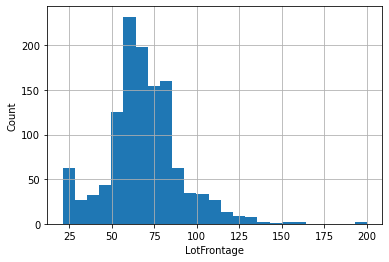

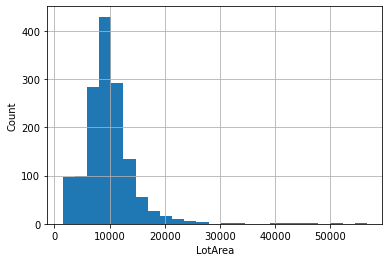

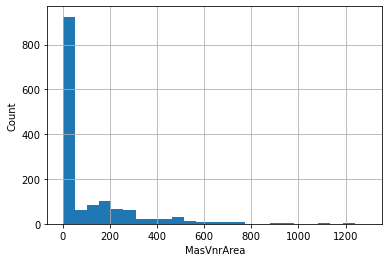

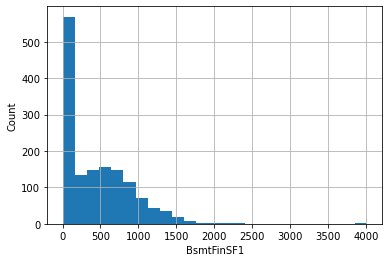

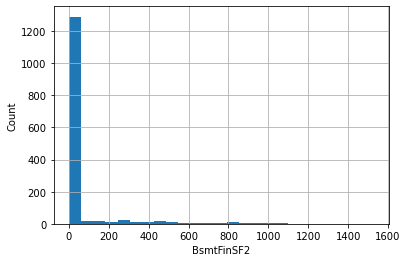

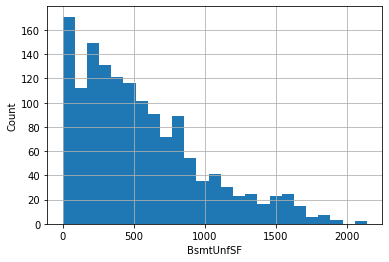

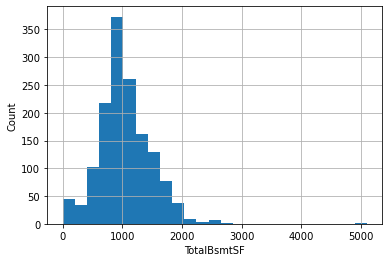

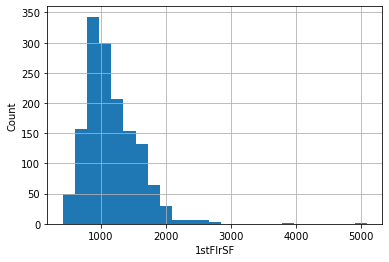

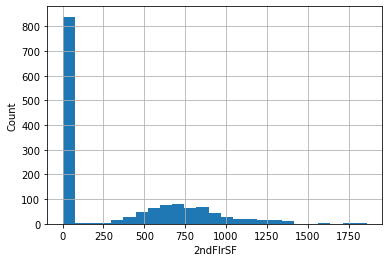

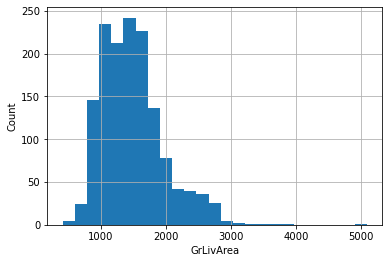

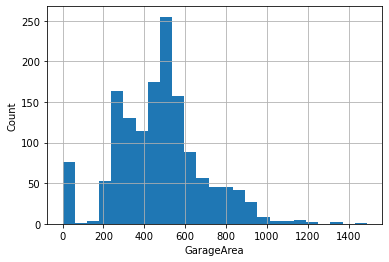

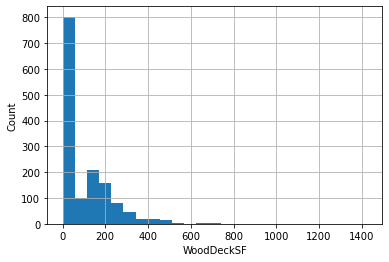

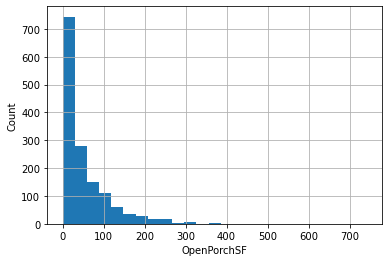

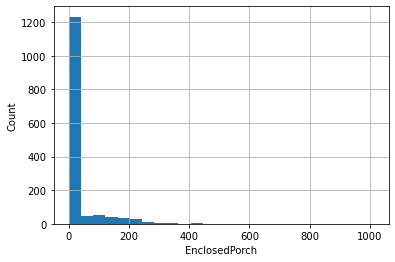

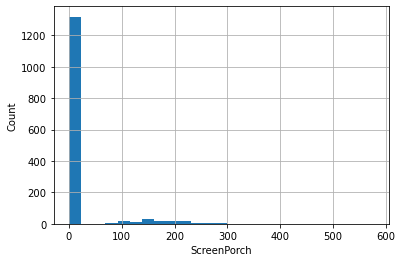

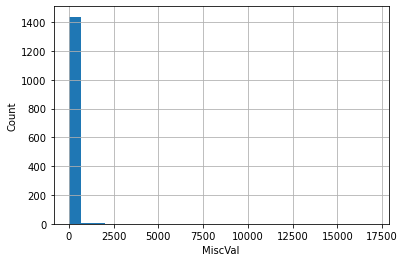

In [97]:
# Analyzing continuous features with historgrams to see distributions

for feature in test_continuous_feats:
    data = test.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

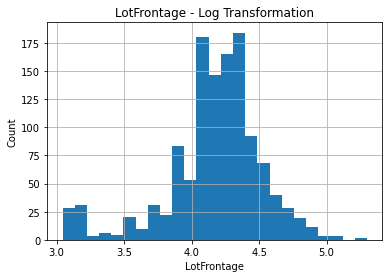

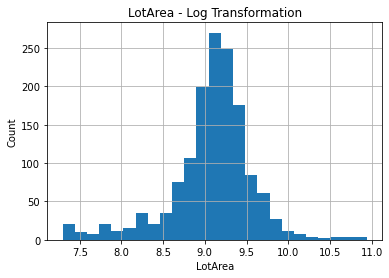

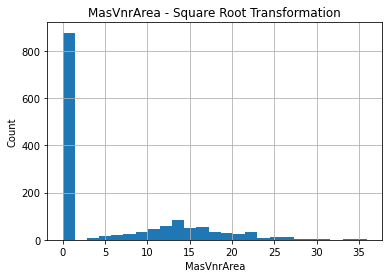

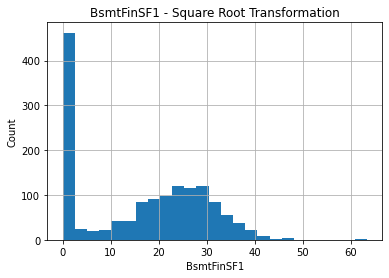

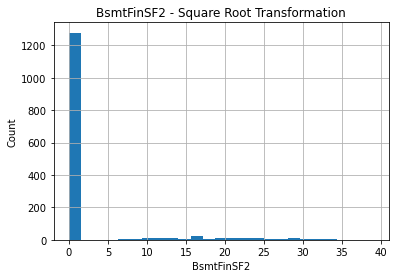

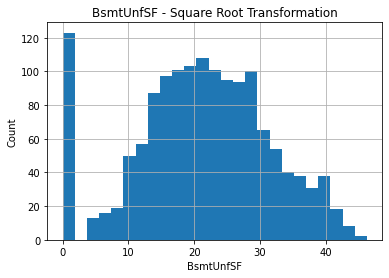

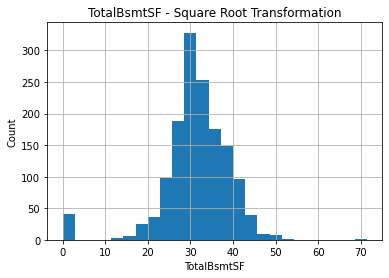

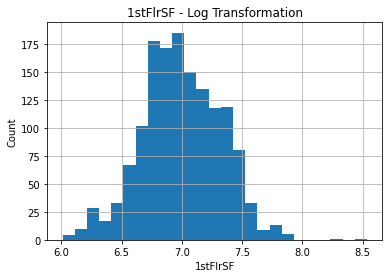

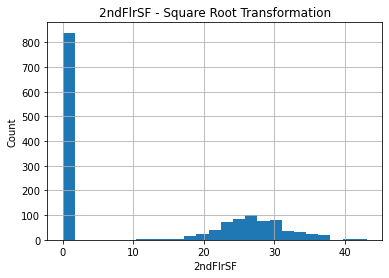

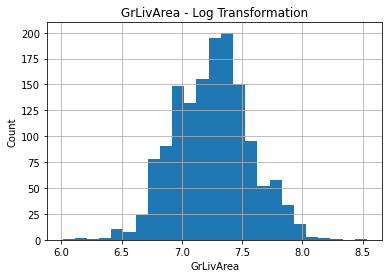

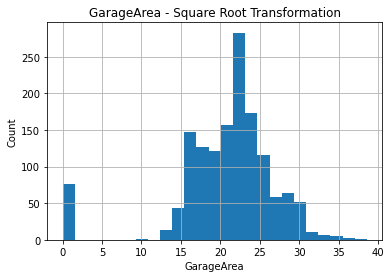

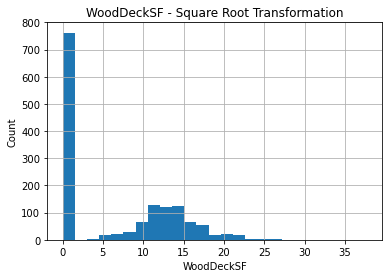

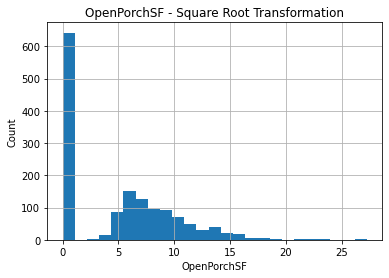

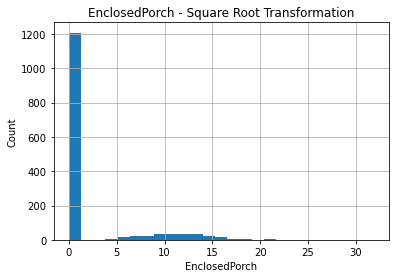

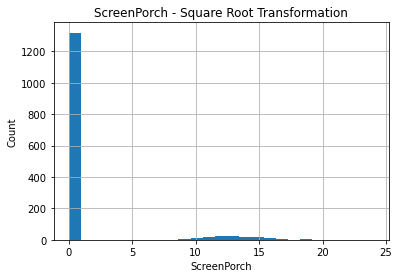

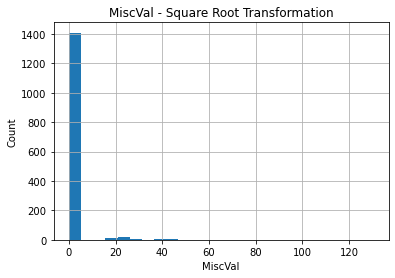

In [98]:
# Visualzing Log Transformation or Square Root Transformation

for feature in test_continuous_feats:
    data = test.copy()
    method = ''
    if 0 in data[feature].unique():
        method = 'Square Root Transformation'
        data[feature] = (data[feature])**(0.5)
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(str(feature)+' - '+ method)
        plt.show()
    else:
        method = 'Log Transformation'
        data[feature] = np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(str(feature)+' - '+ method)
        plt.show()

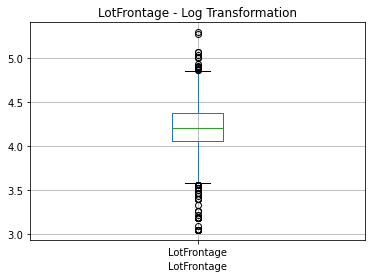

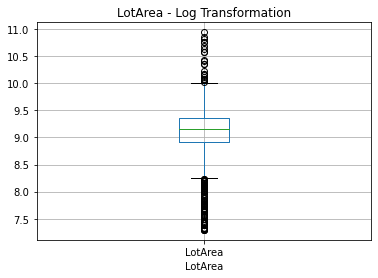

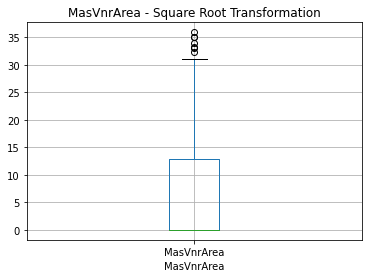

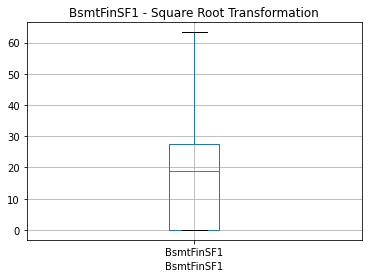

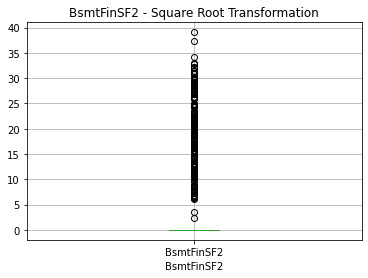

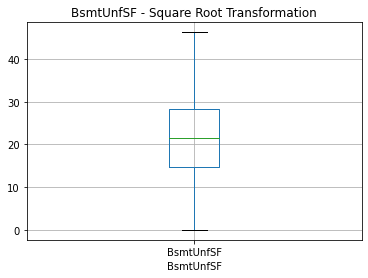

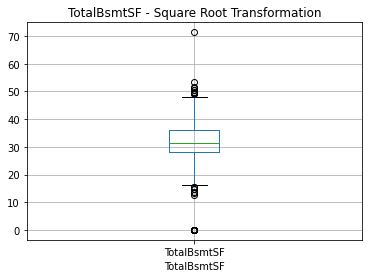

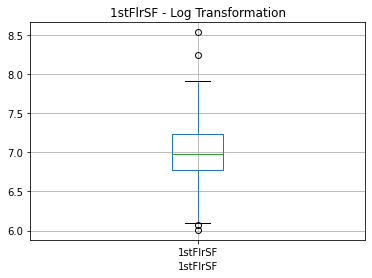

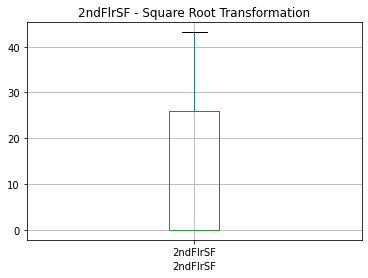

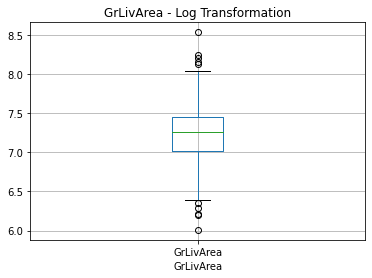

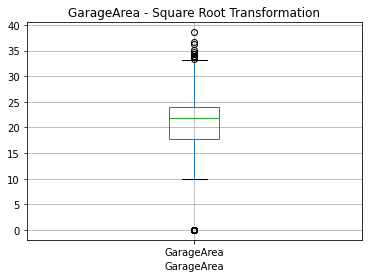

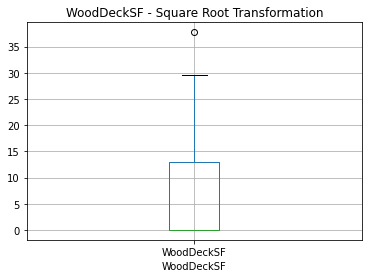

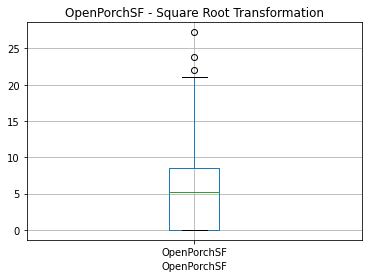

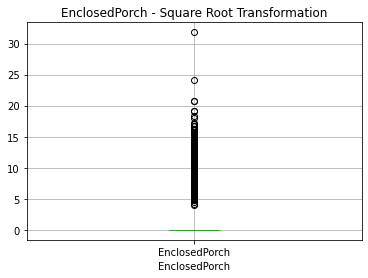

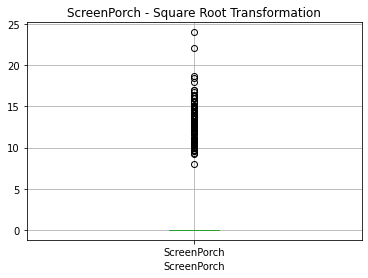

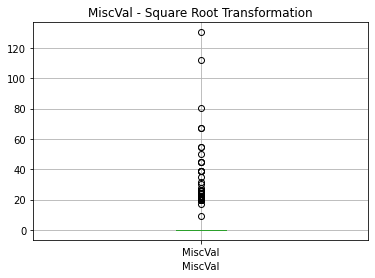

In [99]:
# Outliers
for feature in test_continuous_feats:
    data = test.copy()
    method = ''
    if 0 in data[feature].unique():
        method = 'Square Root Transformation'
        data[feature] = (data[feature])**(0.5)
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.title(str(feature)+' - '+ method)
        plt.show()
    else:
        method = 'Log Transformation'
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.title(str(feature)+' - '+ method)
        plt.show()

In [49]:
# Categorical features
test_cat_feats = [feature for feature in test.columns if test[feature].dtypes == 'O']

print('Number of Categorical Features: {}'.format(len(test_cat_feats)))

Number of Categorical Features: 43


In [101]:
for feature in test_cat_feats:
    test_num_cats = len(test[feature].unique())
    print('{} has {} categories'.format(feature, test_num_cats))

MSZoning has 6 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 5 categories
BldgType has 5 categories
HouseStyle has 7 categories
RoofStyle has 6 categories
RoofMatl has 4 categories
Exterior1st has 14 categories
Exterior2nd has 16 categories
MasVnrType has 5 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 4 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 4 categories
KitchenQual has 5 categories
Functional has 8 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 5 categories
Garag

****Cleaning****

In [52]:
# Categorical features
# checking percentage of NaN values present in each categorical feature
for feature in test_cat_feats:
    missing = np.round(test[feature].isnull().mean(), 4)
    if missing > 0:
        print(feature, round(missing*100,2), '% NaN')

In [51]:
# Filling MSZoning NaN values with mode, grouped by MSSubClass
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# replacing NaN Values for categorical variables with 'none' or mode
test['Alley'].fillna('none', axis=0,inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['MasVnrType'].fillna('none', axis=0,inplace=True)
test['BsmtQual'].fillna('none', axis=0,inplace=True)
test['BsmtCond'].fillna('none', axis=0,inplace=True)
test['BsmtExposure'].fillna('none', axis=0,inplace=True)
test['BsmtFinType1'].fillna('none', axis=0,inplace=True)
test['BsmtFinType2'].fillna('none', axis=0,inplace=True)
test['Electrical'].fillna('SBrkr', axis=0,inplace=True) #mode didn't work?
test['Functional'].fillna(test.Functional.mode()[0], axis=0,inplace=True)
test['FireplaceQu'].fillna('none', axis=0,inplace=True)
test['KitchenQual'].fillna(test.KitchenQual.mode()[0], axis=0,inplace=True)
test['GarageType'].fillna('none', axis=0,inplace=True)
test['GarageFinish'].fillna('none', axis=0,inplace=True)
test['GarageQual'].fillna('none', axis=0,inplace=True)
test['GarageCond'].fillna('none', axis=0,inplace=True)
test['PoolQC'].fillna('none', axis=0,inplace=True)
test['Fence'].fillna('none', axis=0,inplace=True)
test['MiscFeature'].fillna('none', axis=0,inplace=True)
test['SaleType'].fillna(test.SaleType.mode()[0], axis=0,inplace=True)

In [55]:
#Numerical Features
# checking percentage of NaN values present in each numerical feature
for feature in test_num_feats:
    missing = np.round(test[feature].isnull().mean(), 4)
    if missing > 0:
        print(feature, round(missing*100,2), '% NaN')

In [54]:
# LotFrontage ==> Usually neighborhoods have the same lotfrontage
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#GarageArea ==> filling NA with median of GarageType group (works because only single missing na where the garage is Detached)
test['GarageArea'] = test.groupby('GarageType')['GarageArea'].transform(lambda x: x.fillna(x.median()))
#Same thing with GarageCars
test['GarageCars'] = test.groupby('GarageType')['GarageCars'].transform(lambda x: x.fillna(x.median()))

#Filling missing values with median/mean/0 for numerical data
test['MasVnrArea'].fillna(0, axis=0, inplace=True)
test['BsmtFinSF1'].fillna(0, axis=0, inplace=True)
test['BsmtFinSF2'].fillna(0, axis=0, inplace=True)
test['TotalBsmtSF'].fillna(0, axis=0, inplace=True)
test['BsmtFullBath'].fillna(0, axis=0, inplace=True)
test['BsmtHalfBath'].fillna(0, axis=0, inplace=True)
test['BsmtUnfSF'].fillna(0, axis=0, inplace=True)

#Calculated features
#FullBath, HalfBath, BsmtFullBath, BsmtHalfBath ==> # Bathrooms
test['Bathrooms'] = (test['FullBath'] + (test['HalfBath'])/2 + test['BsmtFullBath'] + 
                        (test['BsmtHalfBath'])/2).astype('float64')
# Adding total sqfootage 
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# making missing values in GarageYrBuilt = YrSold
# in order to not hinder the next sections calculations
test['GarageYrBlt'].fillna(test['YrSold'], axis=0, inplace=True)

In [56]:
# Temporals
#GarageYrBlt ==> replacing impossible value with plausible value
test.loc[test['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

#creating AgeSold feature
test['AgeSold'] = test['YrSold'] - test['YearBuilt']

#check
test['AgeSold'].head(3)

0    49
1    52
2    13
Name: AgeSold, dtype: int64

In [57]:
# replacing all year values with number of years from year sold
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test[feature] = test['YrSold'] - test[feature]
# Check
test[temporals].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010


****Final Check****

In [58]:
# creating missing values count variable
missing_values_count = test.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(test.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print('percent of missing cell values: '+ str(percent_missing)+'%')

percent of missing cell values: 0.0%


****Transforming Test Data****

In [59]:
nums = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in nums:
    test[feature] = np.log(test[feature])

In [60]:
#Importing encoder
from sklearn.preprocessing import LabelEncoder

cats = test.dtypes[test.dtypes=='object'].index
le = LabelEncoder()
for x in cats:
    test[x] = le.fit_transform(test[x])
    
#Check
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bathrooms,TotalSF,AgeSold
0,1461,20,2,4.382027,9.360655,1,2,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,3,5,6,0,5,1,49.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,3,0,6,2010,8,4,1.0,1778.0,49
1,1462,20,3,4.394449,9.565704,1,2,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,6,0,5,1,52.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4,1.5,2658.0,52
2,1463,60,3,4.304065,9.534595,1,2,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,3,6,6,1,4,1,13.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,3,0,3,2010,8,4,2.5,2557.0,13
3,1464,60,3,4.356709,9.208138,1,2,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,6,1,2,1,12.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,3,0,6,2010,8,4,2.5,2530.0,12
4,1465,120,3,3.761200,8.518193,1,2,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,6,0,5,1,18.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,3,0,1,2010,8,4,2.0,2560.0,18


In [122]:
#Scaling
feature_scale = [feature for feature in test.columns if feature not in ['Id']]

#Using minmax scaler (based on scale 0 to 1) as opposed to standard scaler (based on standard normal distribution) because there aren't many negative values
# also, according to Krish Naik, minmax scaler performed better

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test[feature_scale])

MinMaxScaler()

In [61]:
# transforming the training set
test_data = pd.concat([test[['Id']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(test[feature_scale]), 
                              columns=feature_scale)], axis=1)

In [63]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bathrooms,AgeSold
0,1461,0.000000,0.50,0.495064,0.428726,1.0,1.0,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.285714,0.0,0.285714,0.444444,0.625,-13.210145,-31.683333,0.2,0.0,0.714286,0.800000,0.50,0.0000,1.000000,1.0,0.2,0.75,0.75,0.75,0.666667,0.082920,0.500000,0.097693,0.115582,0.144354,0.0,1.0,1.0,0.75,0.373438,0.000000,0.0,0.349081,0.0,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.000000,1.0,0.166667,-16.827273,0.666667,0.25,0.514810,0.6,0.8,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,0.666667,0.5,0.75,0.000000,0.454545,1.0,1.0,0.8,0.0,0.360294
1,1462,0.000000,0.75,0.499662,0.468857,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.285714,0.0,0.285714,0.555556,0.625,-13.188406,-31.633333,0.6,0.0,0.785714,0.866667,0.25,0.0675,1.000000,1.0,0.2,0.75,0.75,0.75,0.000000,0.163536,0.833333,0.000000,0.173801,0.217512,0.0,1.0,1.0,0.75,0.522632,0.000000,0.0,0.488544,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,1.0,0.166667,-16.800000,0.666667,0.25,0.220028,0.6,0.8,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,0.666667,1.0,0.00,0.806452,0.454545,1.0,1.0,0.8,0.1,0.382353
2,1463,0.235294,0.75,0.466207,0.462769,1.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.571429,0.444444,0.500,-13.471014,-32.300000,0.2,0.0,0.714286,0.800000,0.50,0.0000,1.000000,1.0,0.4,0.50,0.75,0.75,0.333333,0.140149,0.833333,0.000000,0.058647,0.151882,0.0,0.5,1.0,0.75,0.386718,0.339467,0.0,0.560546,0.0,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.166667,-17.154545,0.000000,0.50,0.339915,0.6,0.8,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,0.666667,0.5,0.75,0.000000,0.181818,1.0,1.0,0.8,0.3,0.095588
3,1464,0.235294,0.75,0.485693,0.398875,1.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.571429,0.555556,0.625,-13.478261,-32.300000,0.2,0.0,0.714286,0.800000,0.25,0.0125,1.000000,1.0,0.4,0.75,0.75,0.75,0.333333,0.106662,0.833333,0.000000,0.138699,0.151555,0.0,0.0,1.0,0.75,0.385901,0.328329,0.0,0.555075,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.166667,-17.163636,0.000000,0.50,0.331453,0.6,0.8,1.0,0.420070,0.065814,0.0,0.0,0.00,0.0,0.666667,1.0,0.75,0.000000,0.454545,1.0,1.0,0.8,0.3,0.088235
4,1465,0.588235,0.75,0.265271,0.263841,1.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.285714,1.0,0.285714,0.777778,0.500,-13.434783,-32.200000,0.2,0.0,0.428571,0.400000,0.50,0.0000,0.666667,1.0,0.4,0.50,0.75,0.75,0.000000,0.046598,0.833333,0.000000,0.435360,0.209493,0.0,0.0,1.0,0.75,0.508416,0.000000,0.0,0.475254,0.0,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,1.0,0.166667,-17.109091,0.333333,0.50,0.356841,0.6,0.8,1.0,0.000000,0.149909,0.0,0.0,0.30,0.0,0.666667,1.0,0.75,0.000000,0.000000,1.0,1.0,0.8,0.2,0.132353


In [64]:
#dropping ID
test_data = test_data.drop(['Id'], axis = 1)

In [65]:
test_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bathrooms,AgeSold
0,0.000000,0.50,0.495064,0.428726,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.500000,0.125,0.285714,0.0,0.285714,0.444444,0.625,-13.210145,-31.683333,0.2,0.0,0.714286,0.800000,0.50,0.0000,1.0,1.0,0.2,0.75,0.75,0.75,0.666667,0.082920,0.500000,0.097693,0.115582,0.144354,0.0,1.0,1.0,0.75,0.373438,0.000000,0.0,0.349081,0.0,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.000000,1.0,0.166667,-16.827273,0.666667,0.25,0.514810,0.6,0.8,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,0.666667,0.5,0.75,0.000000,0.454545,1.0,1.0,0.8,0.0,0.360294
1,0.000000,0.75,0.499662,0.468857,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.250,0.285714,0.0,0.285714,0.555556,0.625,-13.188406,-31.633333,0.6,0.0,0.785714,0.866667,0.25,0.0675,1.0,1.0,0.2,0.75,0.75,0.75,0.000000,0.163536,0.833333,0.000000,0.173801,0.217512,0.0,1.0,1.0,0.75,0.522632,0.000000,0.0,0.488544,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,1.0,0.166667,-16.800000,0.666667,0.25,0.220028,0.6,0.8,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,0.666667,1.0,0.00,0.806452,0.454545,1.0,1.0,0.8,0.1,0.382353
2,0.235294,0.75,0.466207,0.462769,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.571429,0.444444,0.500,-13.471014,-32.300000,0.2,0.0,0.714286,0.800000,0.50,0.0000,1.0,1.0,0.4,0.50,0.75,0.75,0.333333,0.140149,0.833333,0.000000,0.058647,0.151882,0.0,0.5,1.0,0.75,0.386718,0.339467,0.0,0.560546,0.0,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.166667,-17.154545,0.000000,0.50,0.339915,0.6,0.8,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,0.666667,0.5,0.75,0.000000,0.181818,1.0,1.0,0.8,0.3,0.095588


In [67]:
X_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bathrooms,AgeSold
666,0.235294,0.75,0.461171,0.519179,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.500000,0.25,0.285714,0.0,0.714286,0.555556,0.5,0.673913,0.483333,0.0,0.714286,0.642857,0.666667,0.00,0.070625,1.000000,0.5,0.2,0.50,0.75,0.75,0.500000,0.033133,0.666667,0.490502,0.047517,0.167103,0.2,1.00,1.0,1.00,0.559502,0.443099,0.0,0.694665,0.0,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.416667,0.833333,0.333333,0.6,0.666667,0.590909,0.666667,0.50,0.420310,0.8,0.8,1.0,0.000000,0.484461,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.636364,0.25,1.0,0.0,0.3,0.308824
226,0.235294,0.75,0.504203,0.398325,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.625000,0.25,0.285714,0.0,0.714286,0.666667,0.5,0.891304,0.750000,0.2,0.142857,0.857143,0.866667,0.25,0.181250,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.100106,0.833333,0.000000,0.273116,0.196890,0.2,0.00,1.0,1.00,0.488381,0.632446,0.0,0.714884,0.0,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.8,0.166667,0.863636,0.333333,0.75,0.508463,0.8,0.8,1.0,0.261377,0.208410,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.454545,0.25,1.0,0.0,0.3,0.088235
155,0.176471,0.75,0.388581,0.391317,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.291667,0.00,0.285714,0.0,0.000000,0.555556,0.5,0.376812,0.000000,0.2,0.142857,0.928571,0.933333,0.50,0.000000,1.000000,1.0,0.0,0.75,0.75,0.75,0.833333,0.000000,0.833333,0.000000,0.244863,0.093617,0.6,0.25,0.0,0.25,0.203596,0.253753,0.0,0.420355,0.0,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.250000,1.000000,0.000000,1.0,1.000000,0.981818,1.000000,0.00,0.000000,1.0,1.0,0.0,0.000000,0.014625,0.231884,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.272727,0.50,1.0,0.8,0.0,0.617647


****Performing XGBRegressor on test_data****

In [68]:
predictions = xgb.predict(test_data)

In [69]:
predictions

array([11.653399, 11.931485, 12.064846, ..., 11.882252, 11.60174 ,
       12.233045], dtype=float32)

In [72]:
inverse = np.exp(predictions)
inverse

array([115081.914, 151977.11 , 173658.5  , ..., 144675.95 , 109287.78 ,
       205467.8  ], dtype=float32)